In [ ]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

✅ Data loaded. Shape: (2392, 15)


C:\Users\abous\AppData\Local\Temp\ipykernel_30308\517316355.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


<Figure size 1000x800 with 0 Axes>

C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


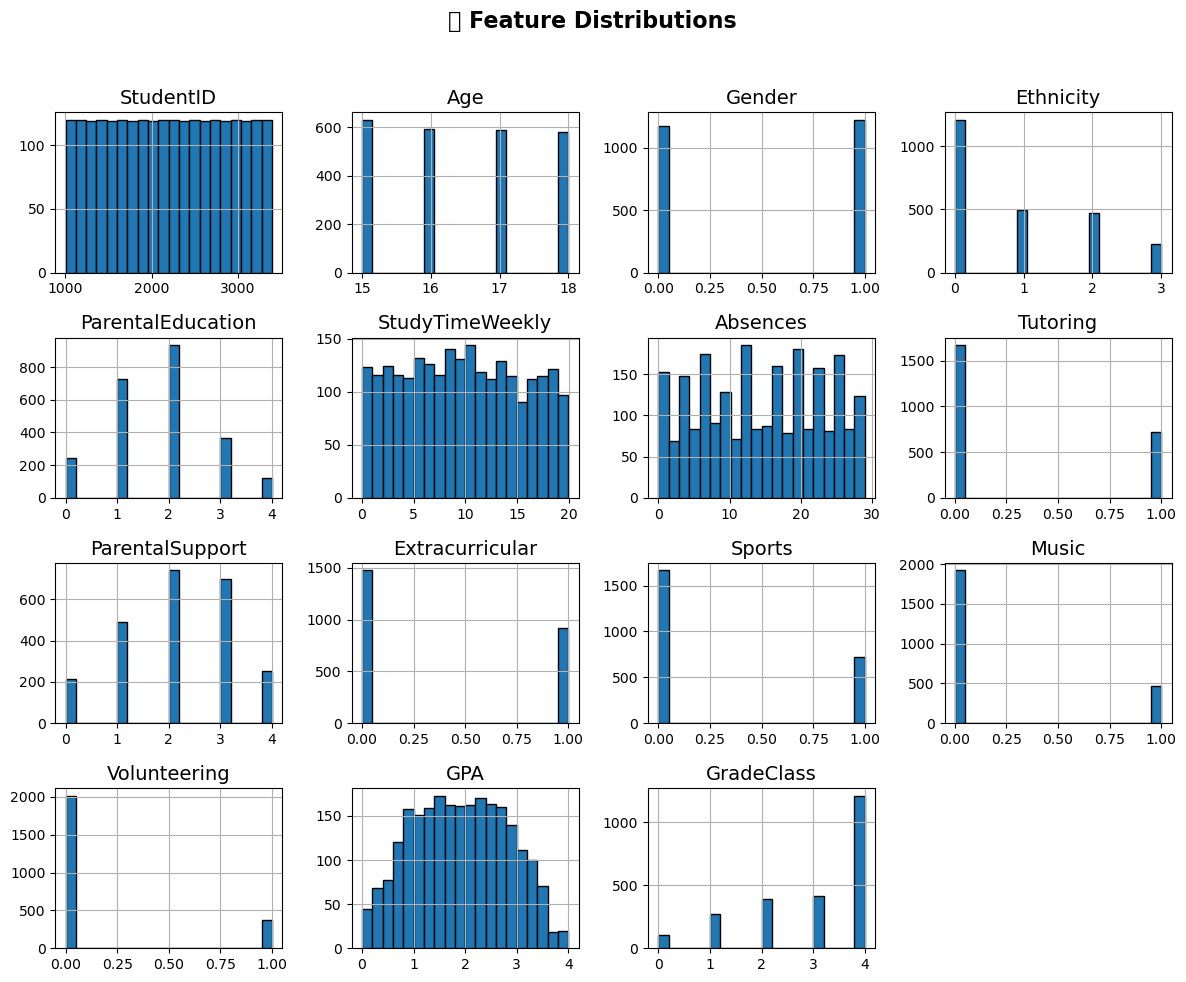

🔍 Total missing values in dataset: 0
✅ No missing values found.


C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


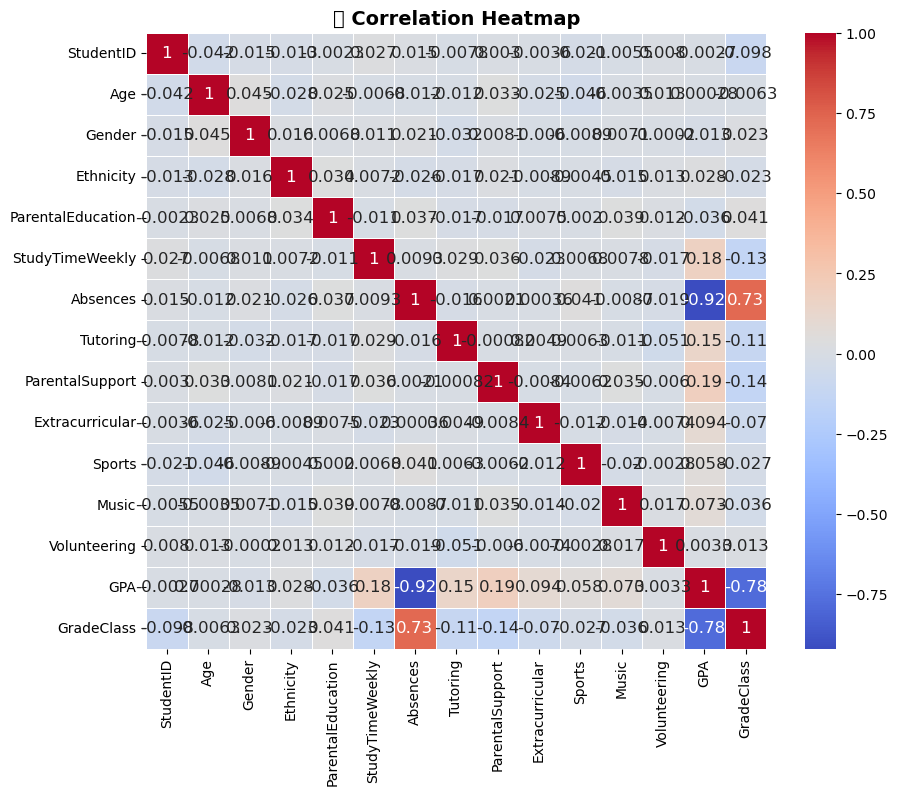

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (make sure the path is correct)
df = pd.read_csv("Student_performance_data _.csv")

# 🔍 Check if data was loaded
print("✅ Data loaded. Shape:", df.shape)

# --- Plot histogram for each column to see the distribution ---
plt.figure(figsize=(10, 8))
df.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle("📊 Feature Distributions", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Create a heatmap of missing values ---
missing_count = df.isnull().sum().sum()
print(f"🔍 Total missing values in dataset: {missing_count}")

if missing_count > 0:
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=True, cmap=sns.color_palette(["#eeeeee", "#FF6F61"]),
                linewidths=0.5, linecolor='black')
    plt.title("📌 Missing Values Heatmap", fontsize=14, fontweight='bold')
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.show()
else:
    print("✅ No missing values found.")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🔗 Correlation Heatmap", fontsize=14, fontweight='bold')
plt.show()



✅ Dropped duplicates. New shape: (2392, 15)

🔍 Columns BEFORE removal:
Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

✅ Columns AFTER removal:
Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')


C:\Users\abous\AppData\Local\Temp\ipykernel_30308\2270332396.py:51: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from current font.
  plt.tight_layout()
C:\Users\abous\AppData\Local\Temp\ipykernel_30308\2270332396.py:51: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from current font.
  plt.tight_layout()
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


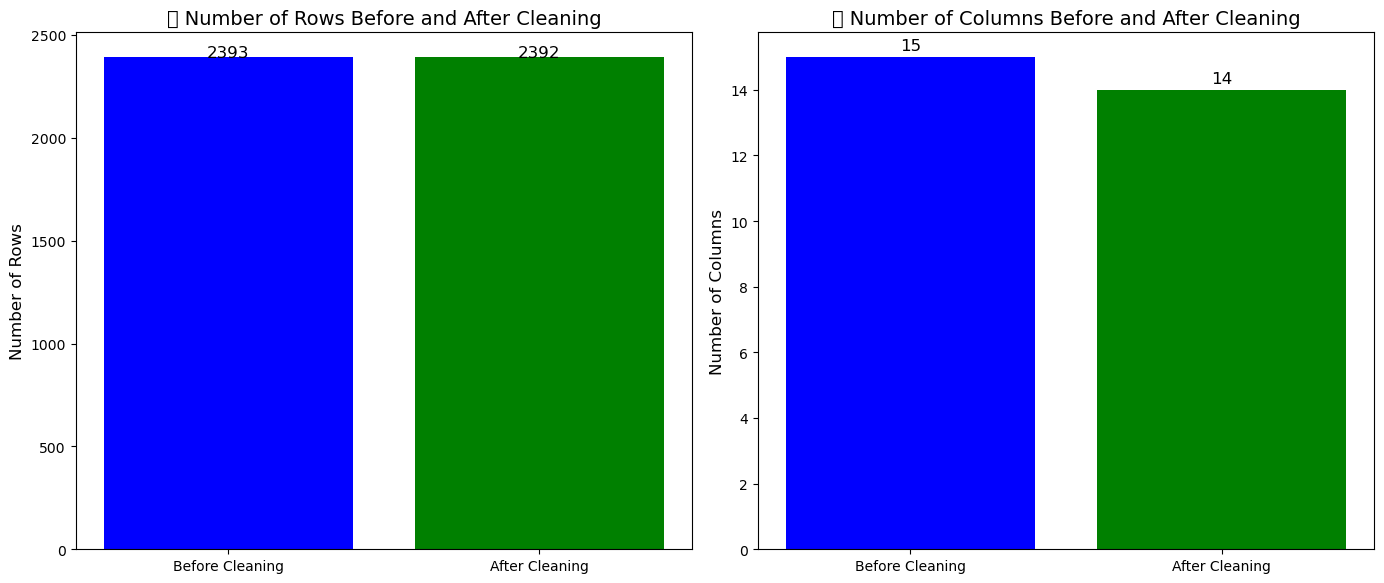

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load dataset ---
df = pd.read_csv("Student_performance_data _.csv")

# 👷 Optional: Add a duplicate row for testing (remove in real case)
df = pd.concat([df, df.iloc[[0]]], ignore_index=True)

# --- Clean Data ---
# Store original shape and columns before cleaning
original_shape = df.shape
original_columns = df.columns

# Remove duplicates
df = df.drop_duplicates()
print("\n✅ Dropped duplicates. New shape:", df.shape)

# Display columns before and after removal
print("\n🔍 Columns BEFORE removal:")
print(original_columns)

# Remove unnecessary columns (if they exist)
df = df.drop(columns=['StudentID'], errors='ignore')

print("\n✅ Columns AFTER removal:")
print(df.columns)

# --- Visual Comparison Before vs After Cleaning ---
# Plotting the changes in the number of columns and rows
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for the number of rows before and after cleaning
rows_before = original_shape[0]
rows_after = df.shape[0]
ax[0].bar(['Before Cleaning', 'After Cleaning'], [rows_before, rows_after], color=['blue', 'green'])
ax[0].set_title('📏 Number of Rows Before and After Cleaning')
ax[0].set_ylabel('Number of Rows')
ax[0].text(0, rows_before + 1, str(rows_before), ha='center')
ax[0].text(1, rows_after + 1, str(rows_after), ha='center')

# Bar plot for the number of columns before and after cleaning
cols_before = len(original_columns)
cols_after = len(df.columns)
ax[1].bar(['Before Cleaning', 'After Cleaning'], [cols_before, cols_after], color=['blue', 'green'])
ax[1].set_title('📐 Number of Columns Before and After Cleaning')
ax[1].set_ylabel('Number of Columns')
ax[1].text(0, cols_before + 0.2, str(cols_before), ha='center')
ax[1].text(1, cols_after + 0.2, str(cols_after), ha='center')

plt.tight_layout()
plt.show()


✔ Encoded 'Gender': [0 1]
✔ Encoded 'Ethnicity': [0 1 2 3]
✔ Encoded 'ParentalEducation': [0 1 2 3 4]
✔ Encoded 'Tutoring': [0 1]
✔ Encoded 'ParentalSupport': [0 1 2 3 4]
✔ Encoded 'Extracurricular': [0 1]
✔ Encoded 'Sports': [0 1]
✔ Encoded 'Music': [0 1]
✔ Encoded 'Volunteering': [0 1]


C:\Users\abous\AppData\Local\Temp\ipykernel_30308\12347655.py:42: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\abous\AppData\Local\Temp\ipykernel_30308\12347655.py:42: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


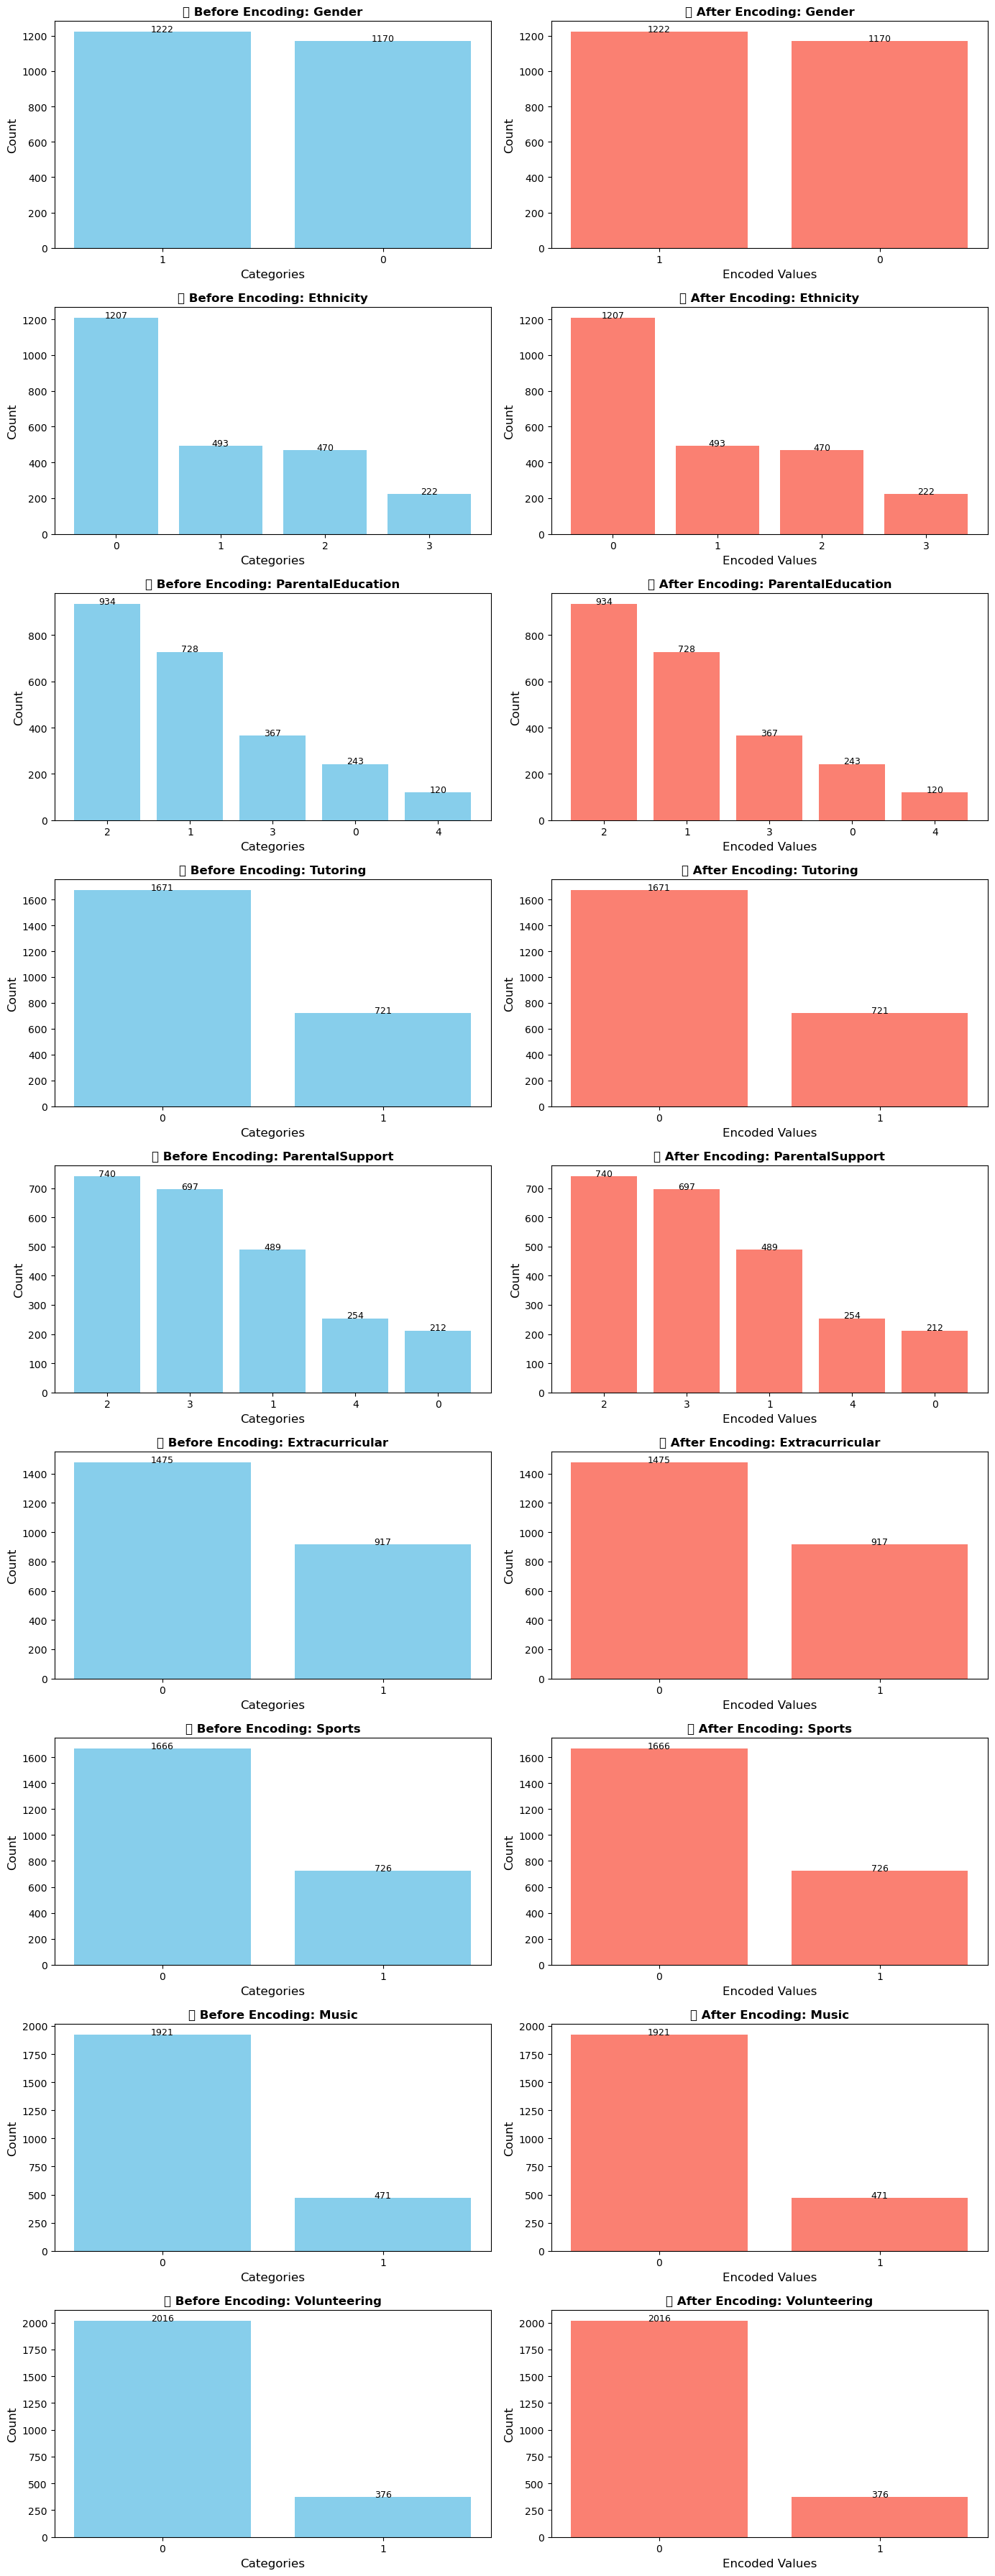

C:\Users\abous\AppData\Local\Temp\ipykernel_30308\12347655.py:57: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


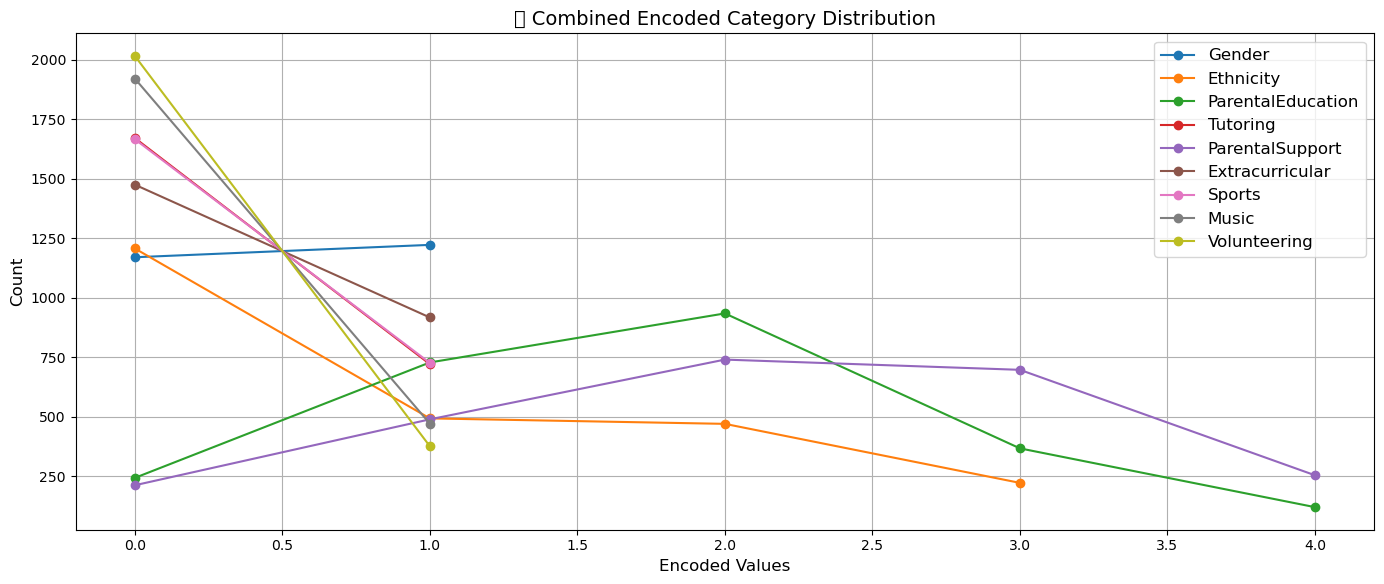

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Sample safeguard
# df = pd.read_csv("Student_performance_data _.csv")

# --- Encode categorical columns ---
label_encoders = {}
categorical_columns = ["Gender", "Ethnicity", "ParentalEducation", "Tutoring", 
                       "ParentalSupport", "Extracurricular", "Sports", "Music", "Volunteering"]

# Plotting before and after encoding (individual)
fig, ax = plt.subplots(len(categorical_columns), 2, figsize=(14, 4 * len(categorical_columns)))

for i, col in enumerate(categorical_columns):
    # --- Before encoding ---
    counts_before = df[col].value_counts()
    ax[i, 0].bar(counts_before.index.astype(str), counts_before.values, color='skyblue')
    ax[i, 0].set_title(f"🔍 Before Encoding: {col}", fontsize=12, fontweight='bold')
    ax[i, 0].set_xlabel('Categories')
    ax[i, 0].set_ylabel('Count')
    for j, v in enumerate(counts_before.values):
        ax[i, 0].text(j, v + 0.5, str(v), ha='center', fontsize=9)

    # --- Encoding ---
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"✔ Encoded '{col}': {le.classes_}")

    # --- After encoding ---
    counts_after = df[col].value_counts()
    ax[i, 1].bar(counts_after.index.astype(str), counts_after.values, color='salmon')
    ax[i, 1].set_title(f"🎯 After Encoding: {col}", fontsize=12, fontweight='bold')
    ax[i, 1].set_xlabel('Encoded Values')
    ax[i, 1].set_ylabel('Count')
    for j, v in enumerate(counts_after.values):
        ax[i, 1].text(j, v + 0.5, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# --- Combined Line Plot for All Columns After Encoding ---
plt.figure(figsize=(14, 6))

for col in categorical_columns:
    counts = df[col].value_counts().sort_index()
    plt.plot(counts.index, counts.values, marker='o', label=col)

plt.title("📊 Combined Encoded Category Distribution")
plt.xlabel("Encoded Values")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\abous\AppData\Local\Temp\ipykernel_30308\3402382531.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\abous\AppData\Local\Temp\ipykernel_30308\3402382531.py:28: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from current font.
  plt.tight_layout()
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


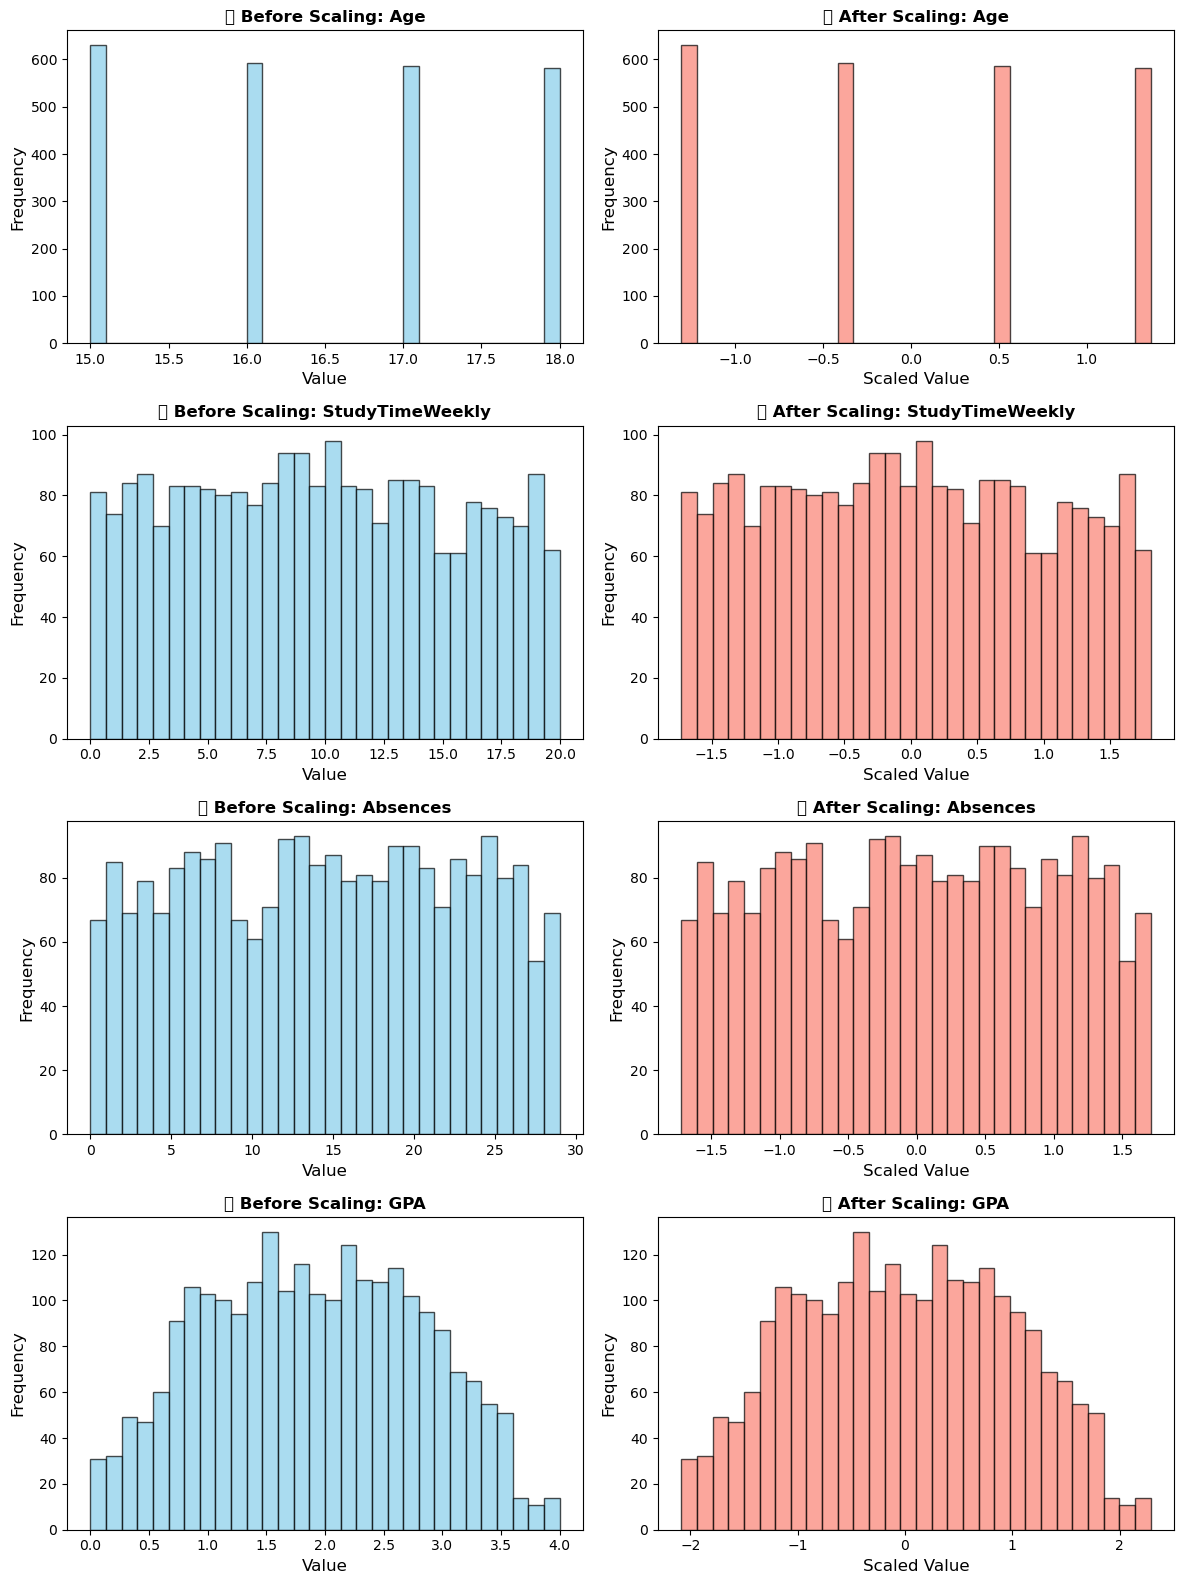


✅ Scaled numerical features preview:
        Age  StudyTimeWeekly  Absences       GPA
0  0.472919         1.780336 -0.890822  1.118086
1  1.362944         0.997376 -1.717694  1.242374
2 -1.307132        -0.984045  1.353542 -1.960277
3  0.472919         0.045445 -0.063951  0.161790
4  0.472919        -0.902311  0.290422 -0.675573


C:\Users\abous\AppData\Local\Temp\ipykernel_30308\3402382531.py:44: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


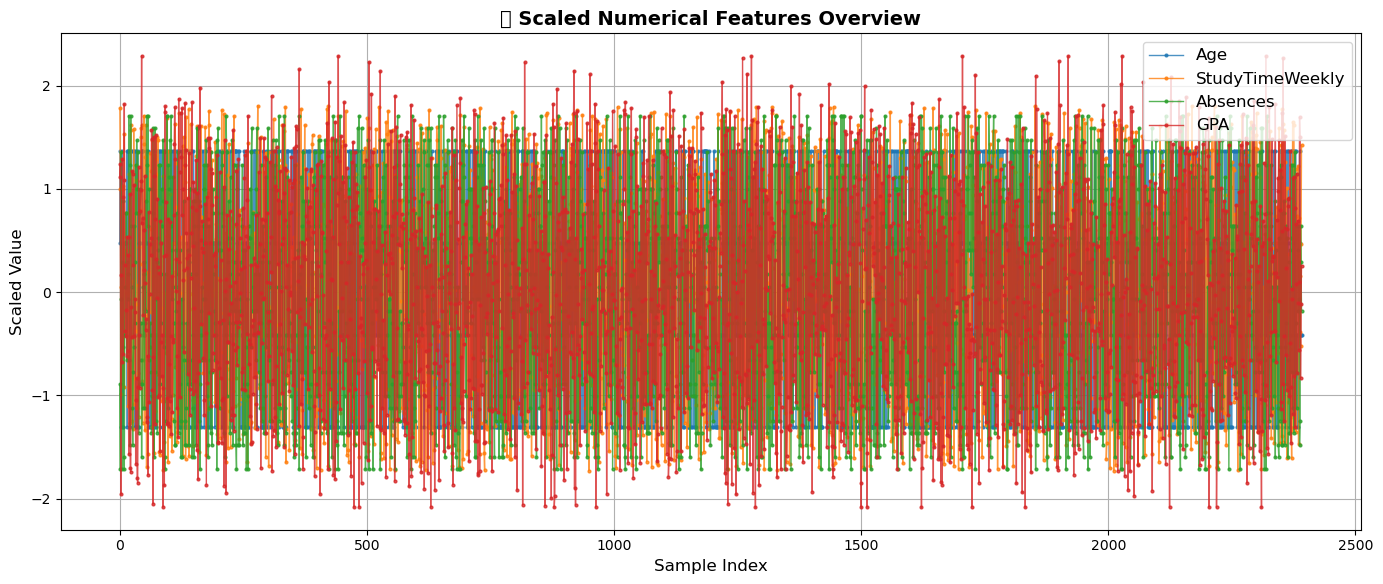

C:\Users\abous\AppData\Local\Temp\ipykernel_30308\3402382531.py:53: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


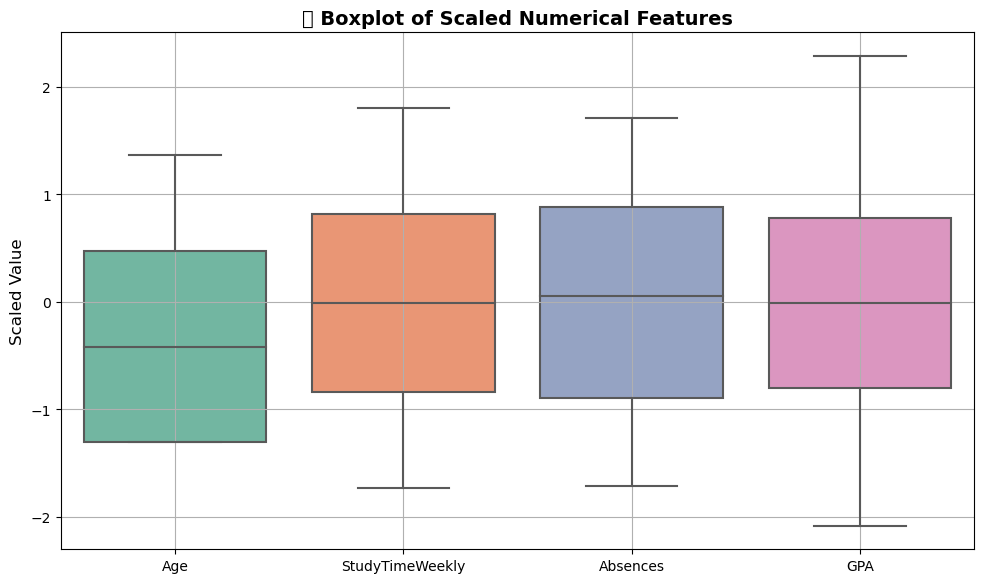

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# --- Scale numerical features ---
numerical_columns = ["Age", "StudyTimeWeekly", "Absences", "GPA"]
scaler = StandardScaler()

# Plotting before and after scaling
fig, ax = plt.subplots(len(numerical_columns), 2, figsize=(12, 4 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    # Before scaling
    ax[i, 0].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax[i, 0].set_title(f"📊 Before Scaling: {col}", fontsize=12, fontweight='bold')
    ax[i, 0].set_xlabel('Value')
    ax[i, 0].set_ylabel('Frequency')

    # Apply Standard Scaling
    df[col] = scaler.fit_transform(df[[col]])

    # After scaling
    ax[i, 1].hist(df[col], bins=30, color='salmon', edgecolor='black', alpha=0.7)
    ax[i, 1].set_title(f"📏 After Scaling: {col}", fontsize=12, fontweight='bold')
    ax[i, 1].set_xlabel('Scaled Value')
    ax[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n✅ Scaled numerical features preview:")
print(df[numerical_columns].head())

# --- 📈 Summary Line Plot ---
plt.figure(figsize=(14, 6))
for col in numerical_columns:
    plt.plot(df[col], label=col, alpha=0.8, marker='o', markersize=2, linewidth=1)

plt.title("🔎 Scaled Numerical Features Overview", fontsize=14, fontweight='bold')
plt.xlabel("Sample Index")
plt.ylabel("Scaled Value")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 📦 Boxplot for Scaled Features ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns], palette="Set2")
plt.title("📦 Boxplot of Scaled Numerical Features", fontsize=14, fontweight='bold')
plt.ylabel("Scaled Value")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1112800087.py:22: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


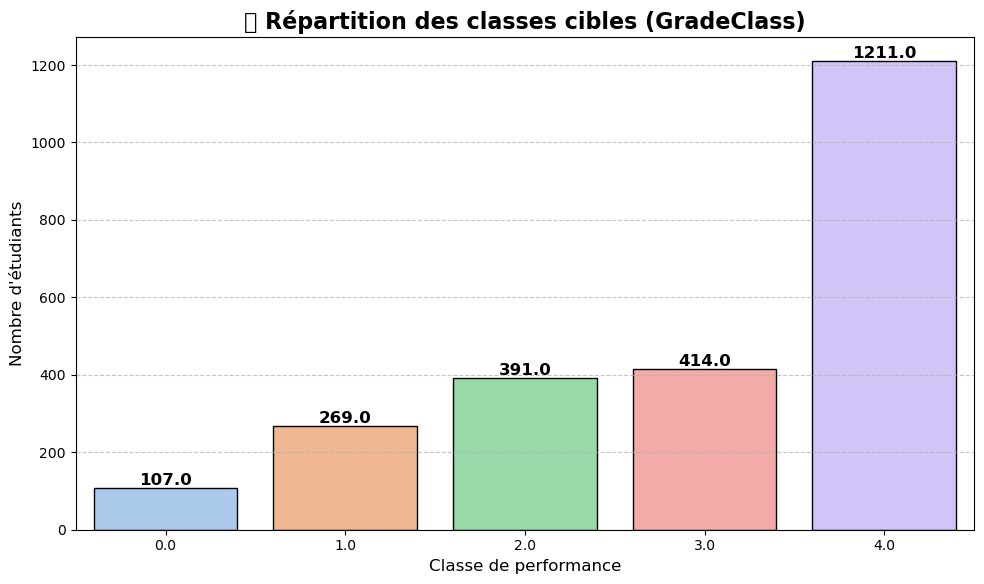


🎯 Distribution des classes cibles :
GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Feature/Target split ---
X = df.drop(columns=['GradeClass'])  # Variables explicatives
y = df['GradeClass']                 # Variable cible

# 🎯 Visualisation de la distribution de la classe cible
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=y, palette='pastel', edgecolor='black')

# Ajouter les annotations sur chaque barre
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title("🎯 Répartition des classes cibles (GradeClass)", fontsize=16, fontweight='bold')
plt.xlabel("Classe de performance", fontsize=12)
plt.ylabel("Nombre d'étudiants", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Affichage dans la console (texte)
print("\n🎯 Distribution des classes cibles :")
print(y.value_counts())



✂️ Train-test split:
Training set: 1674 samples
Test set: 718 samples


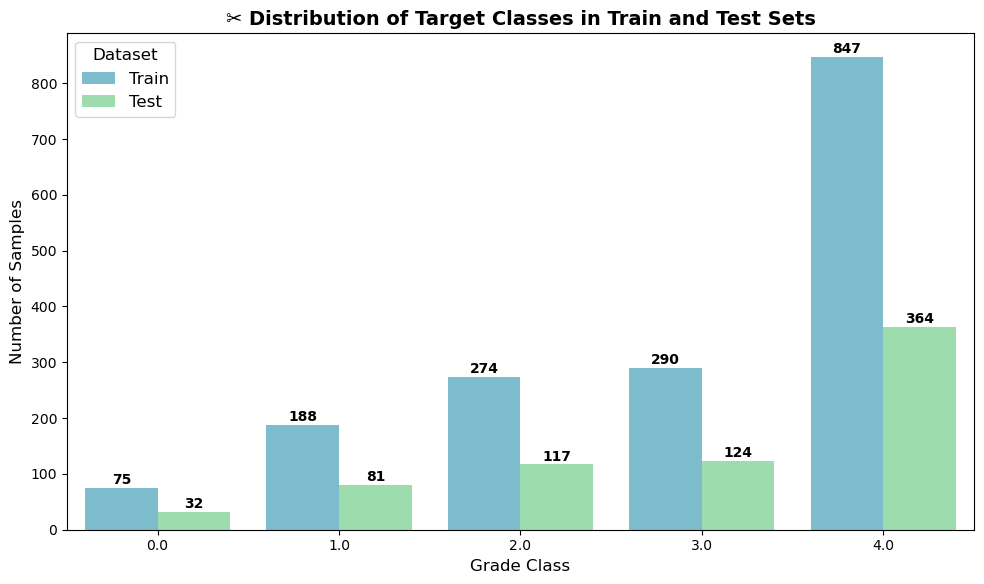

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\n✂️ Train-test split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Prepare data for visualization
train_dist = y_train.value_counts().reset_index()
train_dist.columns = ["Grade Class", "Count"]
train_dist["Set"] = "Train"

test_dist = y_test.value_counts().reset_index()
test_dist.columns = ["Grade Class", "Count"]
test_dist["Set"] = "Test"

# Combine the two datasets
combined_dist = pd.concat([train_dist, test_dist])

# --- Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_dist, x="Grade Class", y="Count", hue="Set", palette=["#6EC4DB", "#92E6A7"])

# Add count labels on top of bars
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title("✂️ Distribution of Target Classes in Train and Test Sets", fontsize=14, fontweight='bold')
plt.xlabel("Grade Class")
plt.ylabel("Number of Samples")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()


In [ ]:
# --- Initialize Models ---
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


🚀 Training KNN


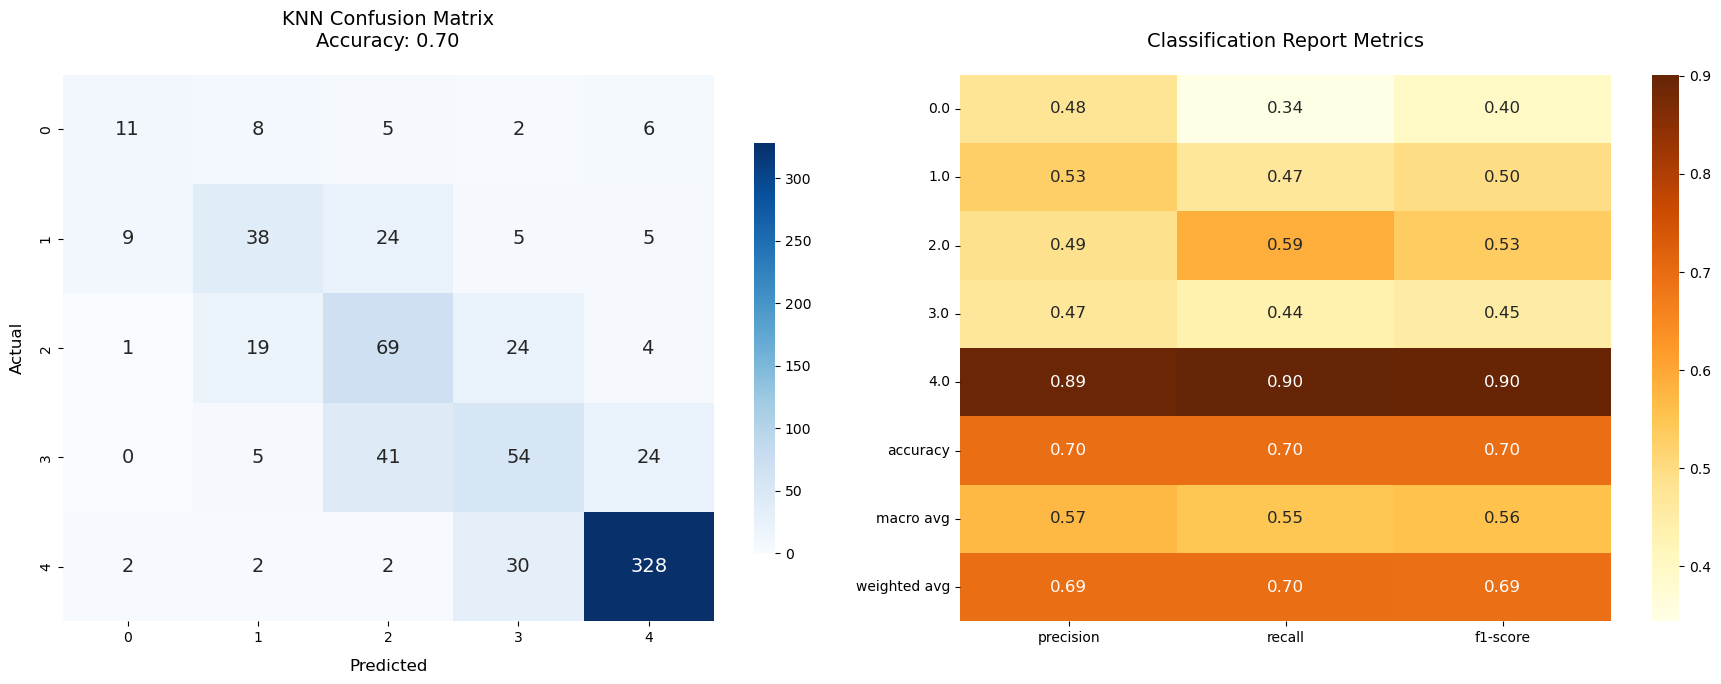


📊 Detailed Performance - KNN:
              precision    recall  f1-score   support

         0.0       0.48      0.34      0.40        32
         1.0       0.53      0.47      0.50        81
         2.0       0.49      0.59      0.53       117
         3.0       0.47      0.44      0.45       124
         4.0       0.89      0.90      0.90       364

    accuracy                           0.70       718
   macro avg       0.57      0.55      0.56       718
weighted avg       0.69      0.70      0.69       718


🚀 Training SVM


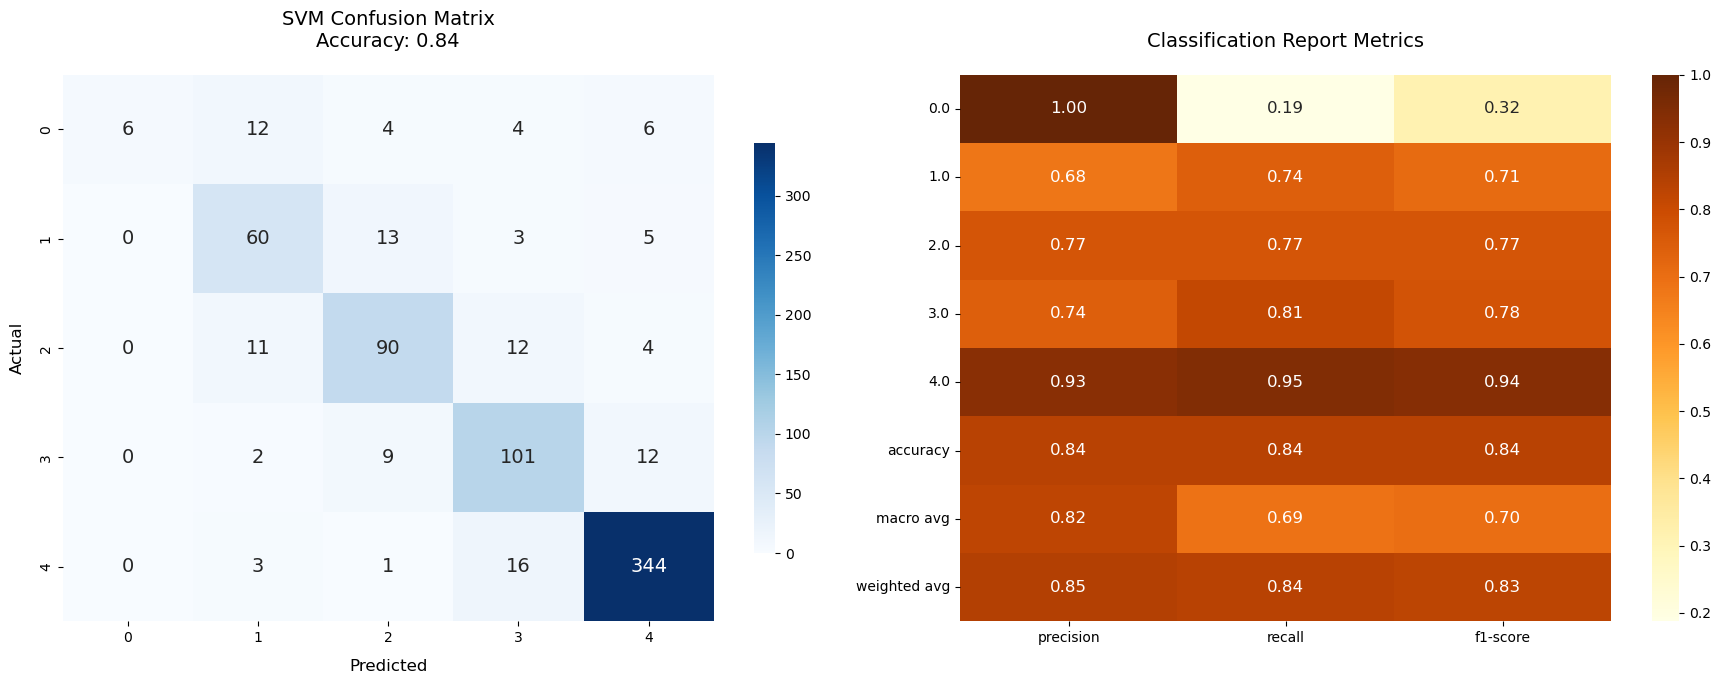


📊 Detailed Performance - SVM:
              precision    recall  f1-score   support

         0.0       1.00      0.19      0.32        32
         1.0       0.68      0.74      0.71        81
         2.0       0.77      0.77      0.77       117
         3.0       0.74      0.81      0.78       124
         4.0       0.93      0.95      0.94       364

    accuracy                           0.84       718
   macro avg       0.82      0.69      0.70       718
weighted avg       0.85      0.84      0.83       718


🚀 Training Decision Tree


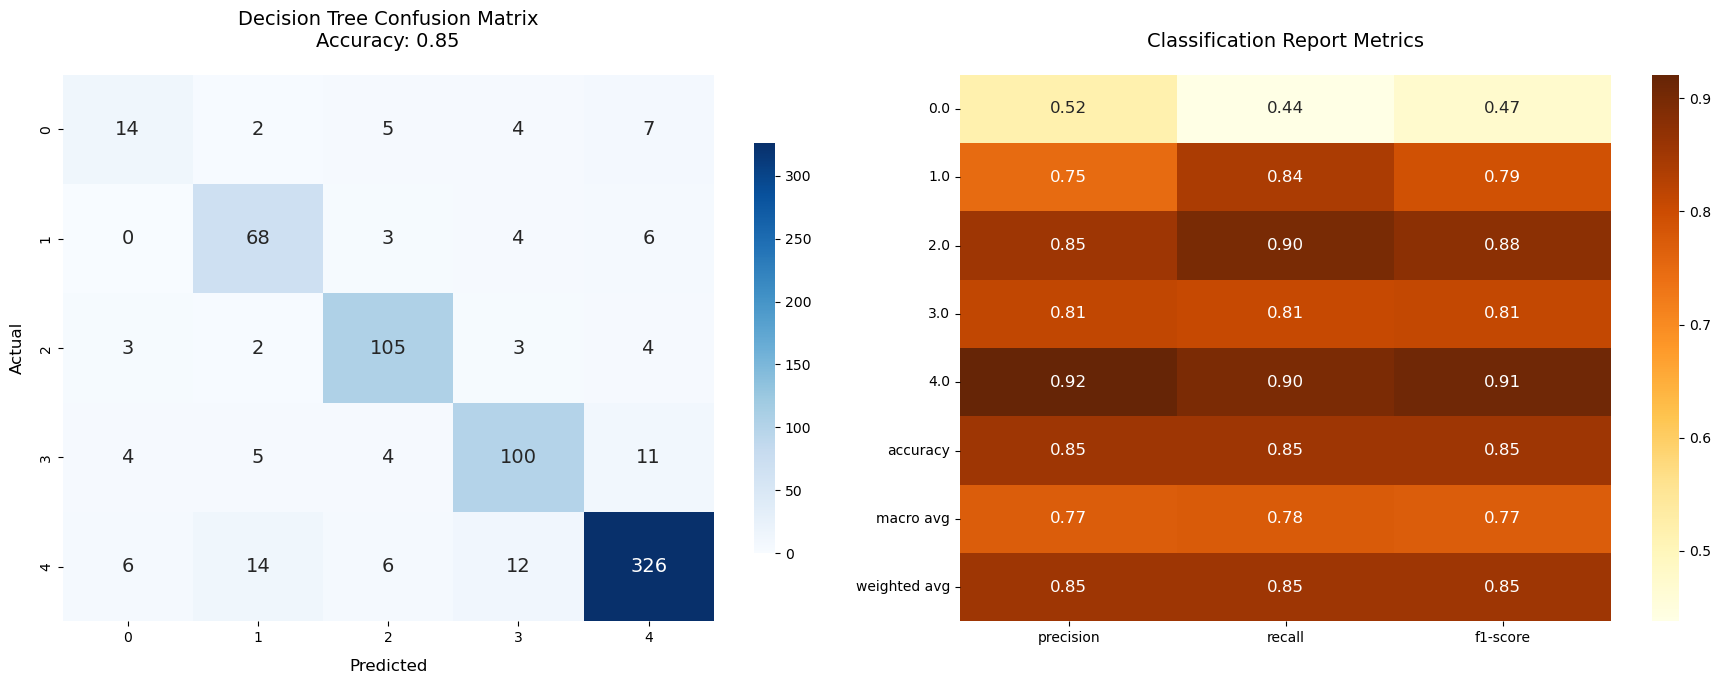


📊 Detailed Performance - Decision Tree:
              precision    recall  f1-score   support

         0.0       0.52      0.44      0.47        32
         1.0       0.75      0.84      0.79        81
         2.0       0.85      0.90      0.88       117
         3.0       0.81      0.81      0.81       124
         4.0       0.92      0.90      0.91       364

    accuracy                           0.85       718
   macro avg       0.77      0.78      0.77       718
weighted avg       0.85      0.85      0.85       718


🔍 Top 5 Features - Decision Tree:
GPA                0.850050
StudyTimeWeekly    0.058120
ParentalSupport    0.022819
Absences           0.018382
Age                0.012844
dtype: float64



🚀 Training Logistic Regression


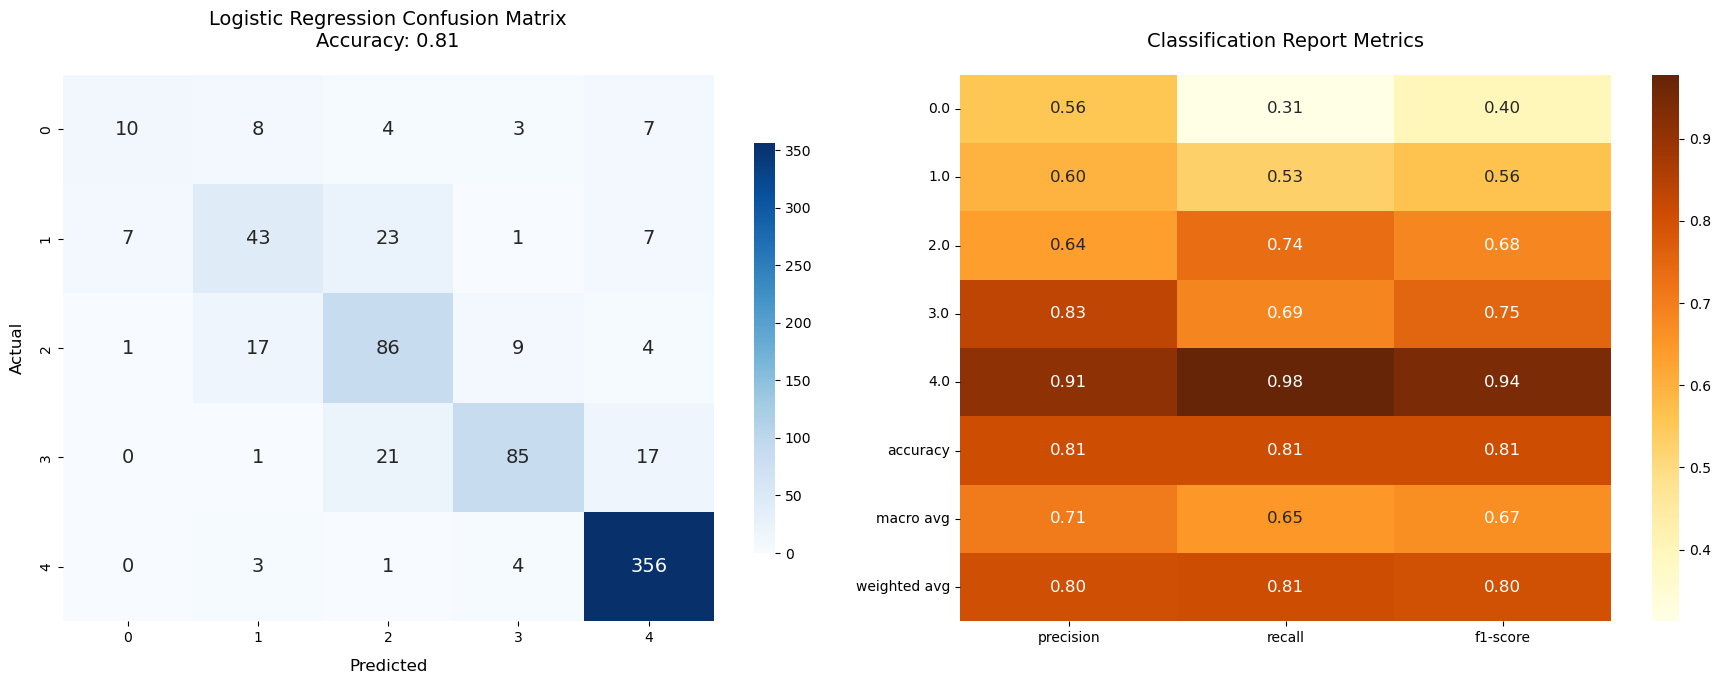


📊 Detailed Performance - Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.56      0.31      0.40        32
         1.0       0.60      0.53      0.56        81
         2.0       0.64      0.74      0.68       117
         3.0       0.83      0.69      0.75       124
         4.0       0.91      0.98      0.94       364

    accuracy                           0.81       718
   macro avg       0.71      0.65      0.67       718
weighted avg       0.80      0.81      0.80       718


🚀 Training Random Forest


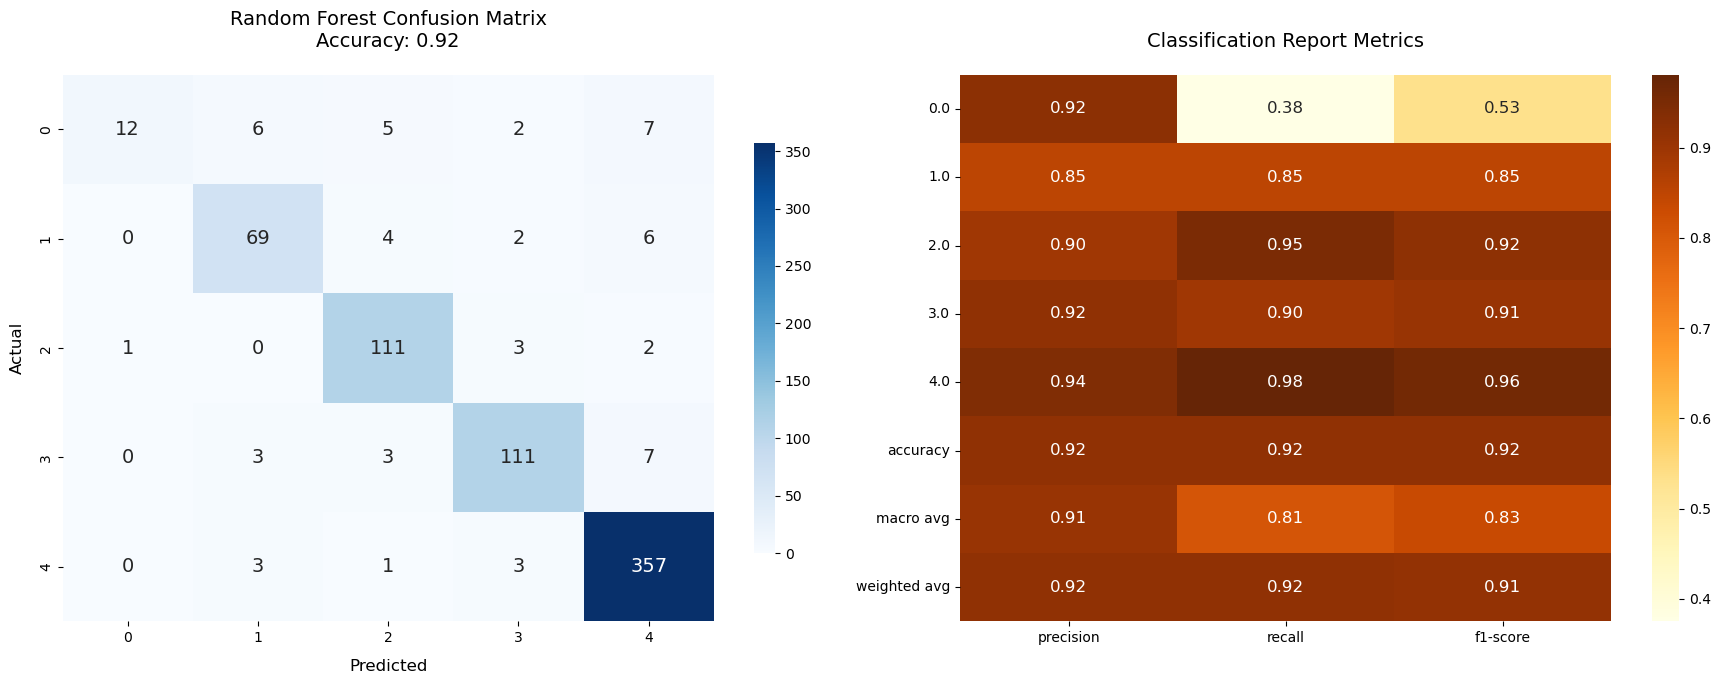


📊 Detailed Performance - Random Forest:
              precision    recall  f1-score   support

         0.0       0.92      0.38      0.53        32
         1.0       0.85      0.85      0.85        81
         2.0       0.90      0.95      0.92       117
         3.0       0.92      0.90      0.91       124
         4.0       0.94      0.98      0.96       364

    accuracy                           0.92       718
   macro avg       0.91      0.81      0.83       718
weighted avg       0.92      0.92      0.91       718


🔍 Top 5 Features - Random Forest:
GPA                  0.487634
Absences             0.238144
StudyTimeWeekly      0.082525
ParentalSupport      0.035188
ParentalEducation    0.028701
dtype: float64



🚀 Training Gradient Boosting


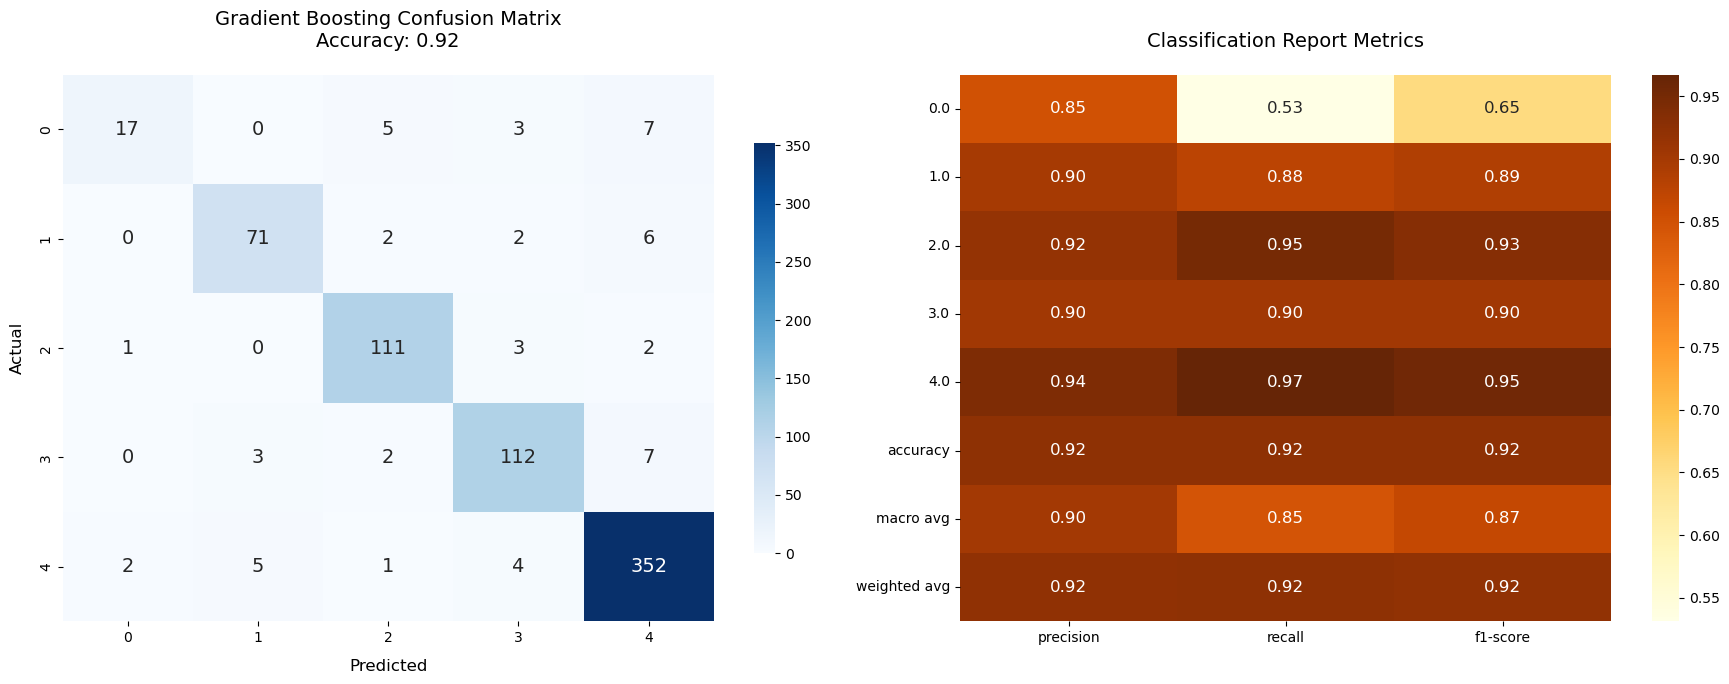


📊 Detailed Performance - Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.85      0.53      0.65        32
         1.0       0.90      0.88      0.89        81
         2.0       0.92      0.95      0.93       117
         3.0       0.90      0.90      0.90       124
         4.0       0.94      0.97      0.95       364

    accuracy                           0.92       718
   macro avg       0.90      0.85      0.87       718
weighted avg       0.92      0.92      0.92       718


🔍 Top 5 Features - Gradient Boosting:
GPA                0.940269
StudyTimeWeekly    0.035185
Absences           0.007349
ParentalSupport    0.004030
Ethnicity          0.003788
dtype: float64



🏆 MODEL COMPARISON


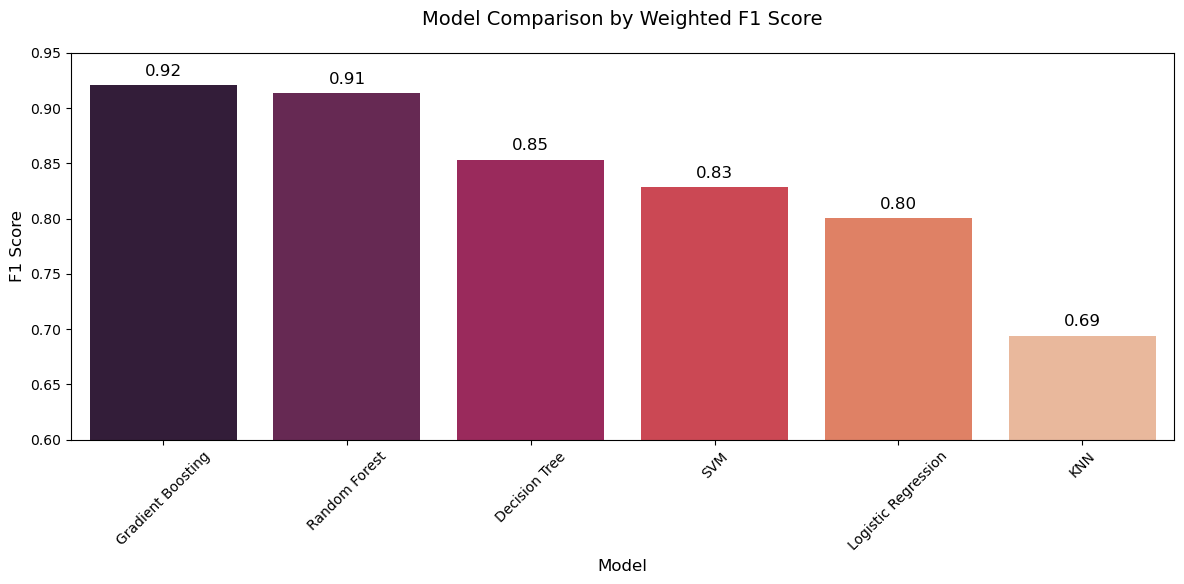

In [ ]:
# --- Improved Visualization Setup ---
import matplotlib.pyplot as plt
plt.rcParams.update({
    'figure.figsize': (12, 8),  # Larger default figure size
    'font.size': 12,            # Increased font size
    'axes.titlesize': 14,       # Bigger titles
    'axes.labelsize': 12,       # Larger axis labels
    'xtick.labelsize': 10,      # X-axis tick size
    'ytick.labelsize': 10       # Y-axis tick size
})

# --- Train and Evaluate Models with Better Display ---
results = {}
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\n{'='*50}\n🚀 Training {name}\n{'='*50}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store results
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1_weighted": f1_score(y_test, y_pred, average='weighted'),
        "model": model
    }
    
    # Create a dedicated figure for each model
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
                annot_kws={"size": 14},  # Bigger annotation numbers
                cbar_kws={"shrink": 0.75})  # Smaller colorbar
    ax1.set_title(f'{name} Confusion Matrix\nAccuracy: {results[name]["accuracy"]:.2f}', pad=20)
    ax1.set_xlabel('Predicted', labelpad=10)
    ax1.set_ylabel('Actual', labelpad=10)
    
    # Classification Report Heatmap
    cr = classification_report(y_test, y_pred, output_dict=True)
    cr_df = pd.DataFrame(cr).iloc[:-1, :].T
    sns.heatmap(cr_df[['precision', 'recall', 'f1-score']], 
                annot=True, fmt='.2f', cmap='YlOrBr', ax=ax2,
                annot_kws={"size": 12})
    ax2.set_title('Classification Report Metrics', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    # Detailed metrics printout
    print(f"\n📊 Detailed Performance - {name}:")
    print(classification_report(y_test, y_pred, target_names=['0.0', '1.0', '2.0', '3.0', '4.0']))
    
    # Feature importance if available
    if hasattr(model, 'feature_importances_'):
        print(f"\n🔍 Top 5 Features - {name}:")
        importance = pd.Series(model.feature_importances_, index=X.columns)
        print(importance.sort_values(ascending=False).head(5))
        print("\n")

# --- Final Comparison --- 
print("\n"+ "="*50 + "\n🏆 MODEL COMPARISON\n" + "="*50)
comparison_df = pd.DataFrame.from_dict(results, orient='index')
comparison_df = comparison_df.sort_values(by='f1_weighted', ascending=False)

# Display with styling
display(comparison_df.style
        .background_gradient(cmap='viridis', subset=['accuracy', 'f1_weighted'])
        .format({'accuracy': '{:.2%}', 'f1_weighted': '{:.2%}'})
        .set_caption("Model Performance Comparison"))

# Visual comparison
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=comparison_df.index, y='f1_weighted', 
                 data=comparison_df.reset_index(), 
                 palette='rocket')
plt.title('Model Comparison by Weighted F1 Score', pad=20)
plt.ylim(0.6, 0.95)
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)

# Add value labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


🏆 Model Comparison:
                     accuracy  f1_weighted
Gradient Boosting    0.923398     0.920857
Random Forest        0.919220     0.913641
Decision Tree        0.853760     0.853138
SVM                  0.837047     0.828248
Logistic Regression  0.807799     0.800459
KNN                  0.696379     0.694017

🔍 Feature Importance - Decision Tree:
GPA                  0.850050
StudyTimeWeekly      0.058120
ParentalSupport      0.022819
Absences             0.018382
Age                  0.012844
ParentalEducation    0.011539
Ethnicity            0.006583
Volunteering         0.004997
Tutoring             0.004461
Sports               0.003024
dtype: float64


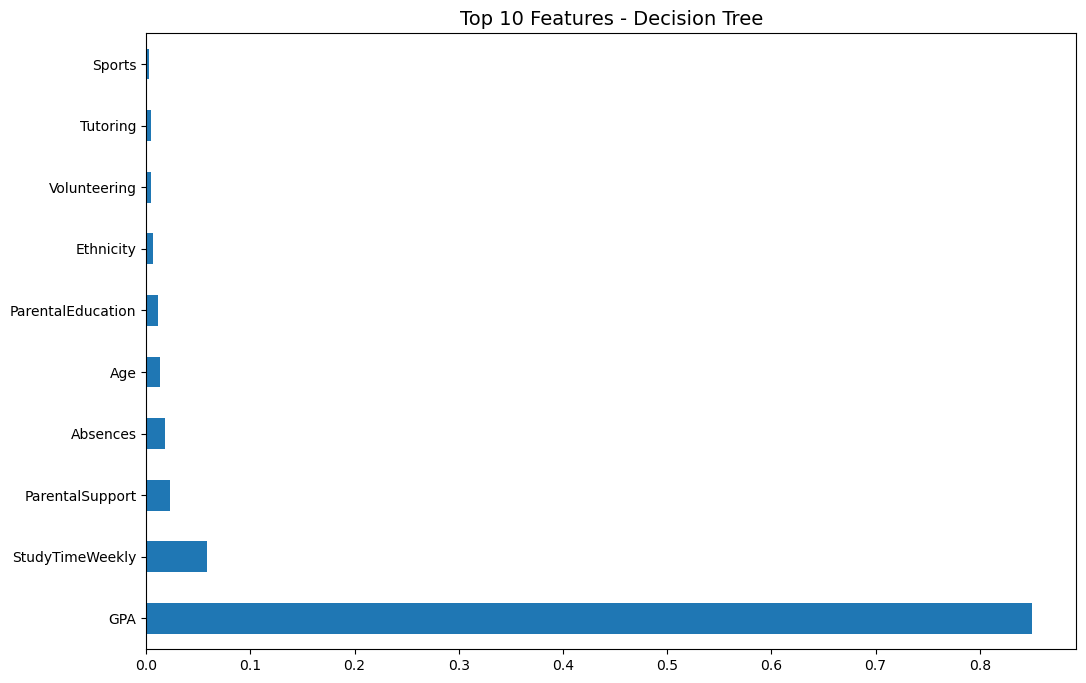


🔍 Feature Importance - Random Forest:
GPA                  0.487634
Absences             0.238144
StudyTimeWeekly      0.082525
ParentalSupport      0.035188
ParentalEducation    0.028701
Age                  0.027649
Ethnicity            0.025075
Tutoring             0.013634
Gender               0.013490
Extracurricular      0.013274
dtype: float64


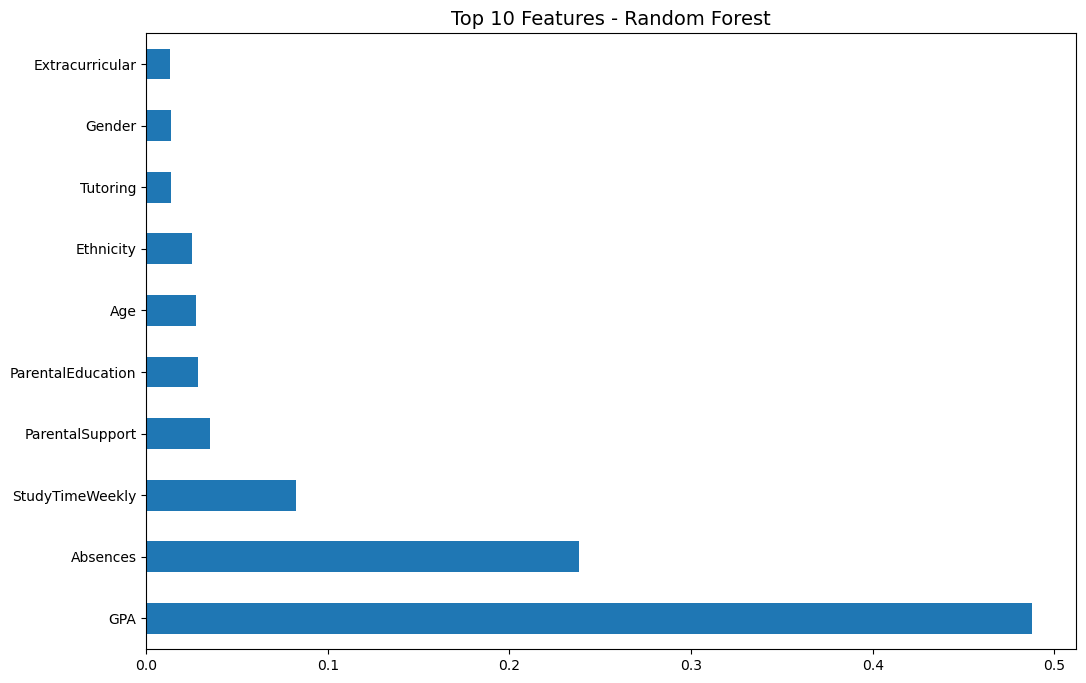


🔍 Feature Importance - Gradient Boosting:
GPA                  0.940269
StudyTimeWeekly      0.035185
Absences             0.007349
ParentalSupport      0.004030
Ethnicity            0.003788
ParentalEducation    0.002923
Age                  0.002471
Extracurricular      0.001090
Tutoring             0.000782
Volunteering         0.000668
dtype: float64


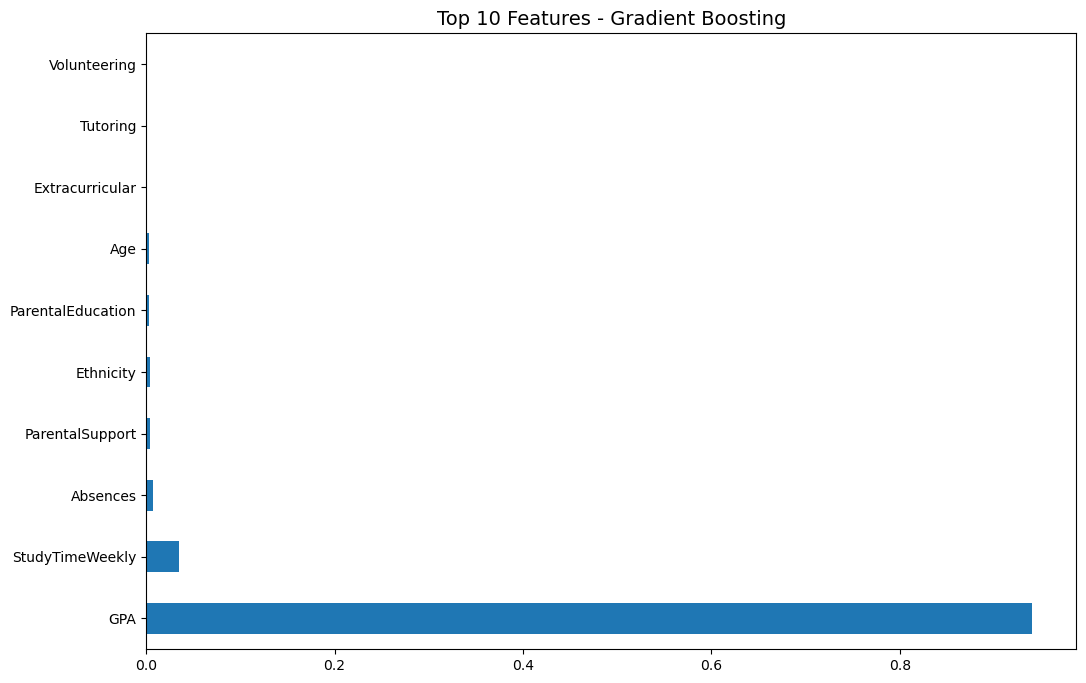

In [ ]:
# --- Compare Models ---
print("\n🏆 Model Comparison:")
comparison_df = pd.DataFrame.from_dict(results, orient='index')[['accuracy', 'f1_weighted']]
print(comparison_df.sort_values(by='f1_weighted', ascending=False))

# --- Feature Importance for Tree-based Models ---
for name in ["Decision Tree", "Random Forest", "Gradient Boosting"]:
    if hasattr(results[name]["model"], 'feature_importances_'):
        print(f"\n🔍 Feature Importance - {name}:")
        importance = pd.Series(results[name]["model"].feature_importances_, index=X.columns)
        print(importance.sort_values(ascending=False).head(10))
        
        # Plot feature importance
        importance.nlargest(10).plot(kind='barh')
        plt.title(f'Top 10 Features - {name}')
        plt.show()


C:\Users\abous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

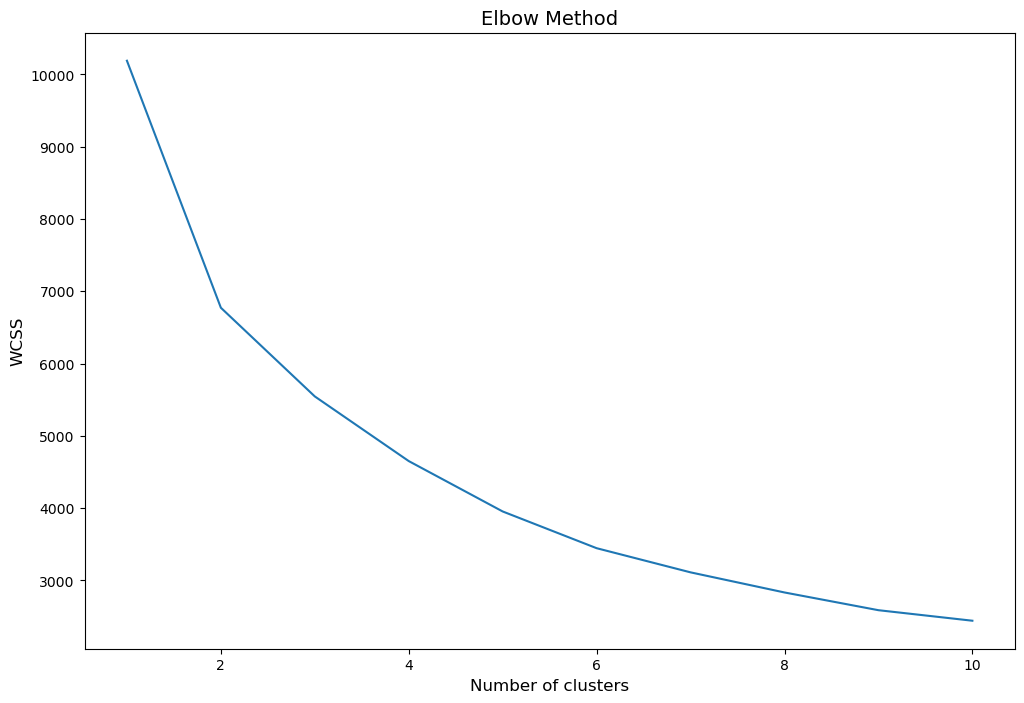

C:\Users\abous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



🎯 Student Segmentation Analysis:
                     GPA  StudyTimeWeekly  Absences  ParentalSupport
StudentCluster                                                      
0               0.571176        -0.295116 -0.816995         1.201389
1              -1.105717        -0.263339  0.935708         1.196809
2              -0.542183         0.133032  0.763839         2.981337
3               1.056241         0.382546 -0.900327         2.942529

⏳ Study Time Estimation Model Coefficients:
GPA                  2.290052
Absences             2.119927
Age                  0.011063
Ethnicity           -0.002387
Volunteering        -0.002848
ParentalEducation   -0.010492
Gender              -0.023146
Music               -0.347053
ParentalSupport     -0.360555
Sports              -0.477749
dtype: float64


In [ ]:
# --- Student Segmentation ---
from sklearn.cluster import KMeans

# Use important features for segmentation
cluster_features = ['GPA', 'StudyTimeWeekly', 'Absences', 'ParentalSupport']
X_cluster = df[cluster_features]

# Determine optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['StudentCluster'] = kmeans.fit_predict(X_cluster)

# Analyze clusters
print("\n🎯 Student Segmentation Analysis:")
print(df.groupby('StudentCluster')[cluster_features].mean())

# --- Time Estimation Model ---
# Predict study time based on other factors
from sklearn.linear_model import LinearRegression

X_time = df.drop(columns=['StudyTimeWeekly', 'GradeClass', 'StudentCluster'])
y_time = df['StudyTimeWeekly']

time_model = LinearRegression()
time_model.fit(X_time, y_time)

print("\n⏳ Study Time Estimation Model Coefficients:")
coeffs = pd.Series(time_model.coef_, index=X_time.columns).sort_values(ascending=False)
print(coeffs.head(10))


🎯 Exemple de prédictions :
Étudiant 1: Vrai classe = 4.0, Prédiction = 4.0
Étudiant 2: Vrai classe = 4.0, Prédiction = 4.0
Étudiant 3: Vrai classe = 4.0, Prédiction = 4.0
Étudiant 4: Vrai classe = 3.0, Prédiction = 3.0
Étudiant 5: Vrai classe = 2.0, Prédiction = 2.0

🔍 Analyse des clusters d'étudiants :
                GPA moyen  Temps étude moyen  Absences moyennes  \
StudentCluster                                                    
0                0.571176          -0.295116          -0.816995   
1               -1.105717          -0.263339           0.935708   
2               -0.542183           0.133032           0.763839   
3                1.056241           0.382546          -0.900327   

                GradeClass typique  
StudentCluster                      
0                              3.0  
1                              4.0  
2                              4.0  
3                              2.0  

💡 Recommandations basées sur l'analyse :
- GPA est le facteur le plu

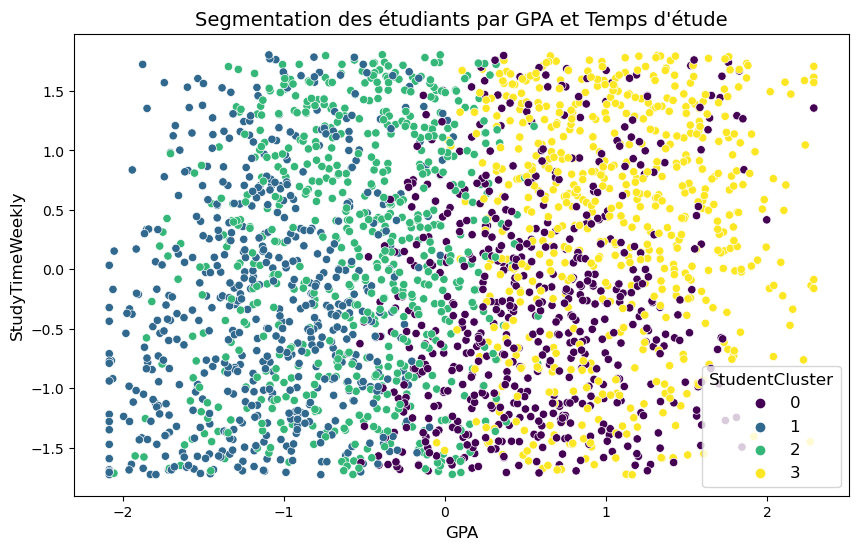

In [ ]:
# --- Démonstration du modèle final ---
from sklearn.metrics import precision_score, recall_score

# Charger le meilleur modèle
best_model = results["Gradient Boosting"]["model"]

# 1. Prédiction sur quelques échantillons
print("\n🎯 Exemple de prédictions :")
sample_data = X_test.iloc[:5]
true_values = y_test.iloc[:5]
predictions = best_model.predict(sample_data)

for i, (true, pred) in enumerate(zip(true_values, predictions)):
    print(f"Étudiant {i+1}: Vrai classe = {true}, Prédiction = {pred}")

# 2. Analyse des clusters
print("\n🔍 Analyse des clusters d'étudiants :")
cluster_analysis = df.groupby('StudentCluster').agg({
    'GPA': 'mean',
    'StudyTimeWeekly': 'mean',
    'Absences': 'mean',
    'GradeClass': lambda x: x.mode()[0]
}).rename(columns={
    'GPA': 'GPA moyen',
    'StudyTimeWeekly': 'Temps étude moyen',
    'Absences': 'Absences moyennes',
    'GradeClass': 'GradeClass typique'
})
print(cluster_analysis)

# 3. Recommandations basées sur les features importantes
print("\n💡 Recommandations basées sur l'analyse :")
print("- GPA est le facteur le plus important : interventions ciblées pour les étudiants à faible GPA")
print("- Temps d'étude hebdomadaire est crucial : programmes de gestion du temps")
print("- Les absences impactent négativement : système d'alerte précoce pour les absences fréquentes")

# 4. Performance par classe
print("\n📈 Performance par classe (Gradient Boosting):")
print(classification_report(y_test, best_model.predict(X_test)))

# 5. Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GPA', y='StudyTimeWeekly', hue='StudentCluster', palette='viridis')
plt.title('Segmentation des étudiants par GPA et Temps d\'étude')
plt.show()

🔧 Starting hyperparameter tuning on 1674 samples and 13 features...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\abous\AppData\Local\Temp\ipykernel_30308\201326914.py:41: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


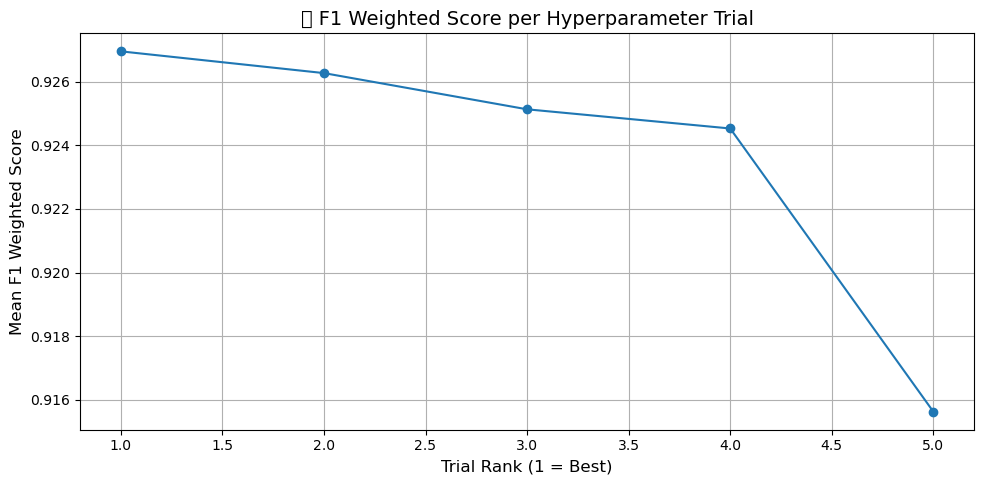

✅ Tuning complete!
⏱️ Time taken: 23.95 seconds
🏆 Best parameters: {'n_estimators': 150, 'min_samples_leaf': 2, 'max_depth': 2, 'learning_rate': 0.01}


In [ ]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4]
}

search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=params,
    scoring='f1_weighted',
    n_iter=5,
    cv=3,
    n_jobs=-1,
    verbose=2  # 👈 Add this for live logs
)

print(f"🔧 Starting hyperparameter tuning on {X_train.shape[0]} samples and {X_train.shape[1]} features...", flush=True)

start_time = time.time()
search.fit(X_train, y_train)
import matplotlib.pyplot as plt
import pandas as pd

# Convert cv_results_ to DataFrame
results_df = pd.DataFrame(search.cv_results_)

# Sort by rank and plot
results_df = results_df.sort_values(by='rank_test_score')

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(results_df)+1), results_df['mean_test_score'], marker='o', linestyle='-')
plt.title("🎯 F1 Weighted Score per Hyperparameter Trial")
plt.xlabel("Trial Rank (1 = Best)")
plt.ylabel("Mean F1 Weighted Score")
plt.grid(True)
plt.tight_layout()
plt.show()

end_time = time.time()

print("✅ Tuning complete!", flush=True)
print("⏱️ Time taken: {:.2f} seconds".format(end_time - start_time), flush=True)
print("🏆 Best parameters:", search.best_params_, flush=True)


In [ ]:
import matplotlib.pyplot as plt

# Get the prediction result
outcome = predict_student_outcome(student_df)

# Bar chart
labels = ['Predicted Grade', 'Required Study Time (hrs)']
values = [outcome['predicted_grade'], outcome['required_study_time']]
colors = ['green', 'blue']

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)
plt.title(f"Student Risk Level: {outcome['risk_level'].capitalize()}")
plt.ylim(0, max(values)+1)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


NameError: name 'predict_student_outcome' is not defined

In [ ]:
# Cluster-based intervention rules
cluster_rules = {
    0: "Time management training",
    1: "Intensive tutoring + attendance monitoring",
    2: "Study methods workshop",
    3: "Peer leadership opportunities"
}

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

cluster_features = ['Absences', 'StudyTimeWeekly', 'GPA']  # ✅ Updated

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train[cluster_features])  # ✅ Will now work

# Team formation function
def form_balanced_team(students_df, n_members=4):
    clusters = kmeans.predict(students_df[cluster_features])
    selected_indices = [
        np.where(clusters == i)[0][0]
        for i in range(n_members)
        if len(np.where(clusters == i)[0]) > 0
    ]
    return students_df.iloc[selected_indices]

# Print team + interventions
def print_team_with_interventions(team_df):
    clusters = kmeans.predict(team_df[cluster_features])
    for i, (index, row) in enumerate(team_df.iterrows()):
        rule = cluster_rules.get(clusters[i], "No rule defined")
        print(f"👤 Student {i+1} - Cluster {clusters[i]} → Recommended: {rule}")
        
team = form_balanced_team(X_train)
print_team_with_interventions(team)


C:\Users\abous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


👤 Student 1 - Cluster 0 → Recommended: Time management training
👤 Student 2 - Cluster 1 → Recommended: Intensive tutoring + attendance monitoring
👤 Student 3 - Cluster 2 → Recommended: Study methods workshop
👤 Student 4 - Cluster 3 → Recommended: Peer leadership opportunities


In [ ]:
# Calculate sample weights (e.g., class weights for the training data)
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train  # Assuming y_train is defined
)

# Re-train a model with balanced sample weights
gb = GradientBoostingClassifier(random_state=42).fit(X_train, y_train, sample_weight=sample_weights)


In [ ]:
!pip install shap


🔍 Explaining class 0


C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.savefig(f"shap_summary_class_{class_id}.png", dpi=300, bbox_inches='tight')  # Save with tight bbox
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


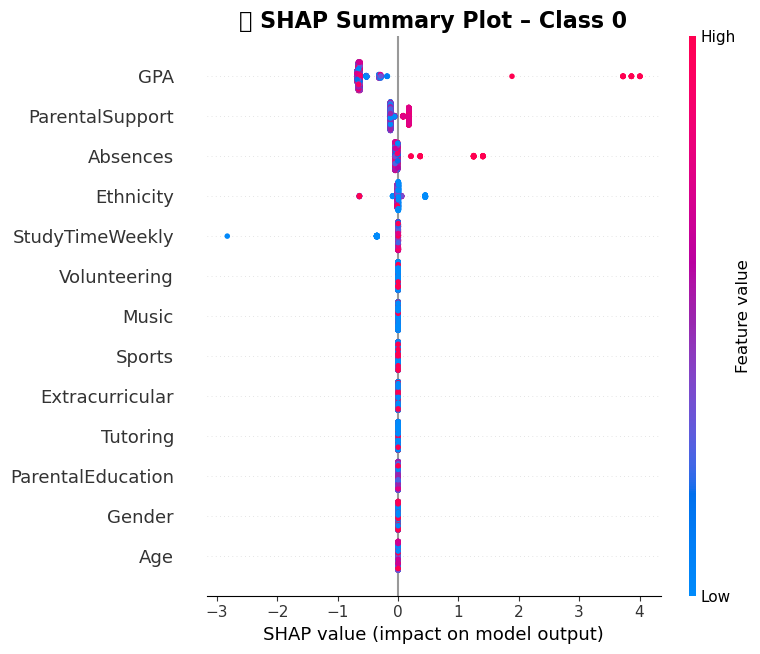

🔍 Explaining class 1


C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.savefig(f"shap_summary_class_{class_id}.png", dpi=300, bbox_inches='tight')  # Save with tight bbox
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


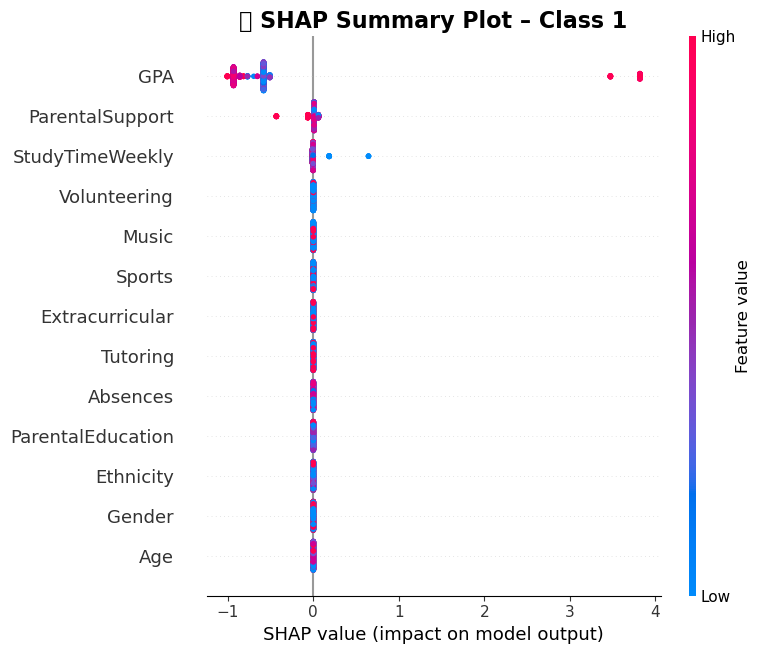

🔍 Explaining class 2


C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.savefig(f"shap_summary_class_{class_id}.png", dpi=300, bbox_inches='tight')  # Save with tight bbox
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


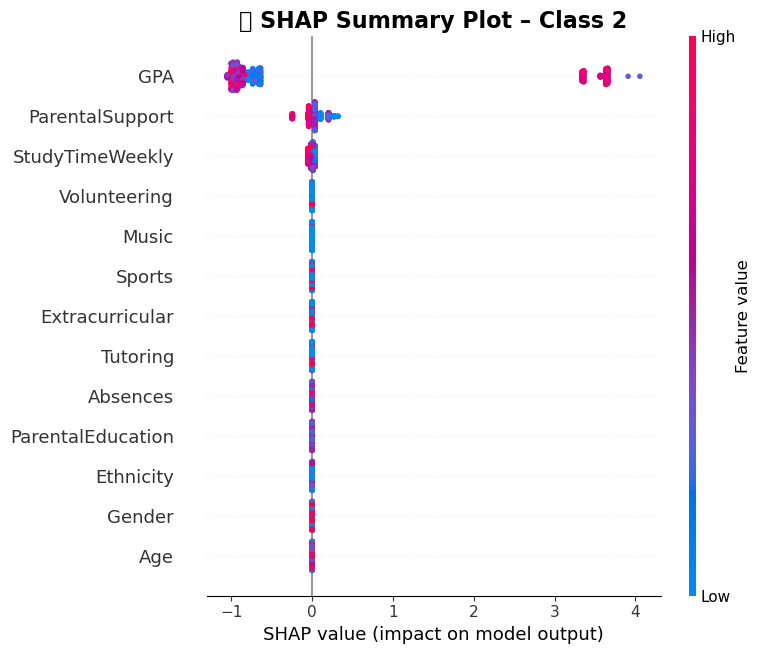

🔍 Explaining class 3


C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.savefig(f"shap_summary_class_{class_id}.png", dpi=300, bbox_inches='tight')  # Save with tight bbox
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


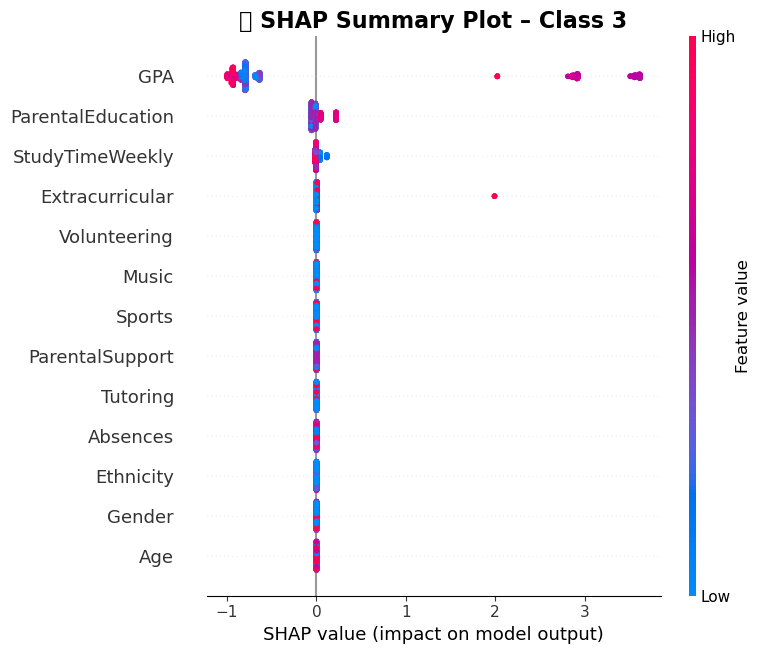

🔍 Explaining class 4


C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\abous\AppData\Local\Temp\ipykernel_30308\1214725192.py:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.savefig(f"shap_summary_class_{class_id}.png", dpi=300, bbox_inches='tight')  # Save with tight bbox
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


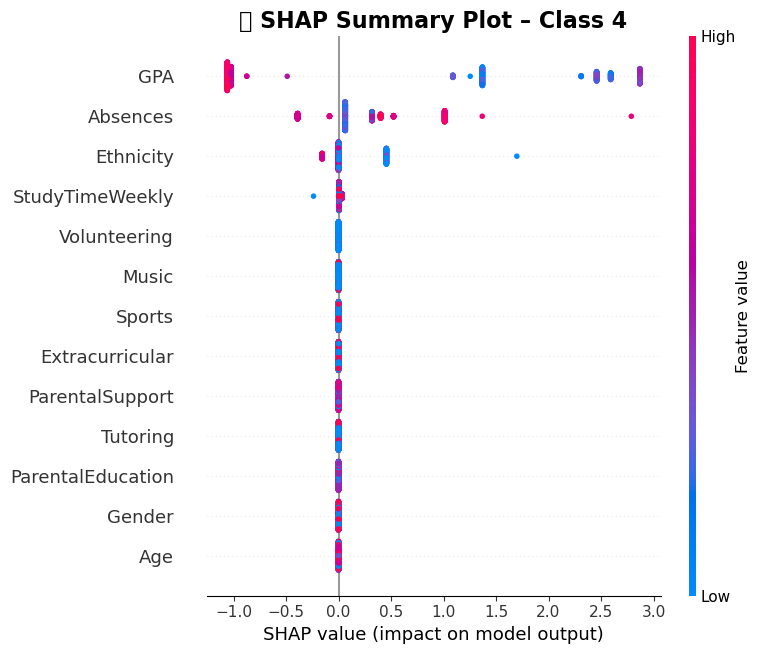

In [ ]:
import shap
import matplotlib.pyplot as plt

for class_id in range(gb.n_classes_):
    print(f"🔍 Explaining class {class_id}")
    tree = gb.estimators_[0, class_id]  # Take the first tree for this class
    explainer = shap.TreeExplainer(tree)
    shap_values = explainer.shap_values(X_test)

    # Set larger figure size
    plt.figure(figsize=(20, 15))  # Larger figure to accommodate all points
    shap.summary_plot(shap_values, X_test, show=False, plot_type="dot")
    
    plt.title(f"🔍 SHAP Summary Plot – Class {class_id}", fontsize=16, fontweight='bold')
    plt.tight_layout()

    # Save the plot in higher resolution and without cropping
    plt.savefig(f"shap_summary_class_{class_id}.png", dpi=300, bbox_inches='tight')  # Save with tight bbox
    plt.show()


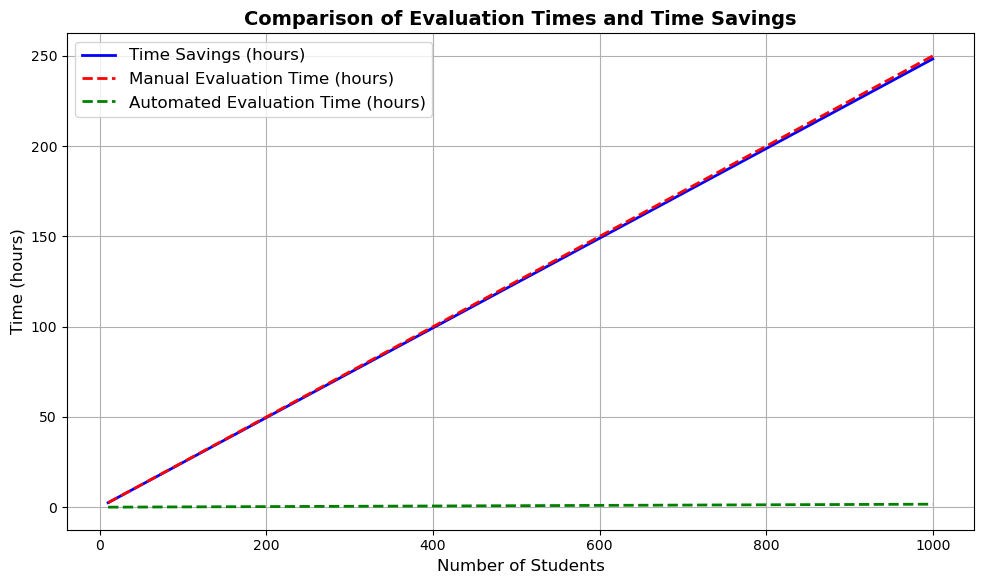

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate different numbers of students
student_counts = np.arange(10, 1001, 10)  # From 10 to 1000 students in steps of 10

# Calculate time for manual and auto evaluations
manual_eval_times = 15 * student_counts  # 15 mins per student
auto_eval_times = 0.1 * student_counts  # 0.1 mins (6 seconds) per student

# Calculate time savings
time_savings = (manual_eval_times - auto_eval_times) / 60  # Convert to hours

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(student_counts, time_savings, label='Time Savings (hours)', color='blue', linewidth=2)
plt.plot(student_counts, manual_eval_times / 60, label='Manual Evaluation Time (hours)', color='red', linestyle='--', linewidth=2)
plt.plot(student_counts, auto_eval_times / 60, label='Automated Evaluation Time (hours)', color='green', linestyle='--', linewidth=2)

# Labels and title
plt.title("Comparison of Evaluation Times and Time Savings", fontsize=14, fontweight='bold')
plt.xlabel("Number of Students", fontsize=12)
plt.ylabel("Time (hours)", fontsize=12)
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)

def generate_learning_path(student_data):
    try:
        logging.info("Student Data: %s", student_data)  # Check the data being passed
        logging.info("Cluster Features: %s", student_data[cluster_features])  # Check cluster features being used
        cluster = kmeans.predict([student_data[cluster_features]])[0]
        logging.info("Predicted Cluster: %s", cluster)
        grade_pred = best_model.predict([student_data])[0]
        logging.info("Predicted Grade: %s", grade_pred)
        
        return {
            'recommended_resources': resource_db[cluster][grade_pred],
            'suggested_meetings': tutoring_schedule[cluster]
        }
    except Exception as e:
        logging.error("Error in generate_learning_path: %s", e)

def monitor_model_performance():
    try:
        logging.info("Loading new student data...")
        new_data = pd.read_csv("new_students.csv")
        logging.info("New Data Loaded: %s", new_data.head())  # Check the new data being loaded
        X_new, y_new = preprocess(new_data)
        
        current_acc = accuracy_score(y_new, best_model.predict(X_new))
        logging.info("Current Accuracy: %f", current_acc)
        
        if current_acc < 0.85:
            logging.info("Accuracy is below threshold, retraining model.")
            retrain_model()
            
        return current_acc
    except Exception as e:
        logging.error("Error in monitor_model_performance: %s", e)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Dictionnaire des modèles
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Entraîner tous les modèles sur le jeu d'entraînement
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = {"model": model}



🔍 Évaluation du modèle Random Forest...

📝 Rapport de classification - Random Forest:
              precision    recall  f1-score   support

         0.0       0.92      0.38      0.53        32
         1.0       0.85      0.85      0.85        81
         2.0       0.90      0.95      0.92       117
         3.0       0.92      0.90      0.91       124
         4.0       0.94      0.98      0.96       364

    accuracy                           0.92       718
   macro avg       0.91      0.81      0.83       718
weighted avg       0.92      0.92      0.91       718



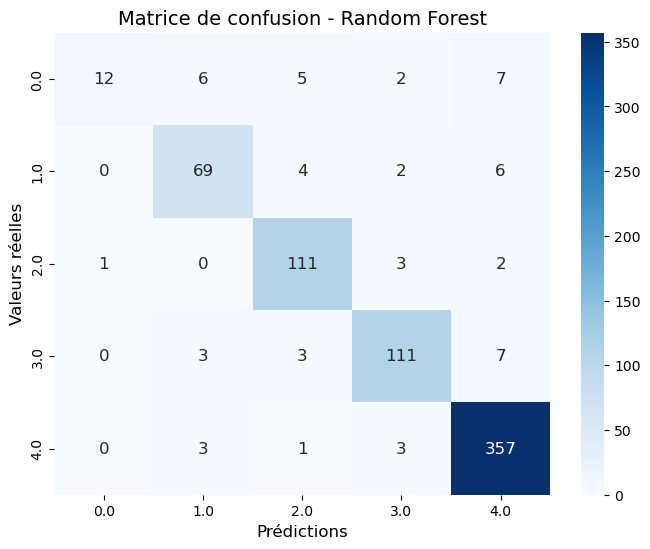


🔍 Évaluation du modèle Gradient Boosting...

📝 Rapport de classification - Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.85      0.53      0.65        32
         1.0       0.90      0.88      0.89        81
         2.0       0.92      0.95      0.93       117
         3.0       0.90      0.90      0.90       124
         4.0       0.94      0.97      0.95       364

    accuracy                           0.92       718
   macro avg       0.90      0.85      0.87       718
weighted avg       0.92      0.92      0.92       718



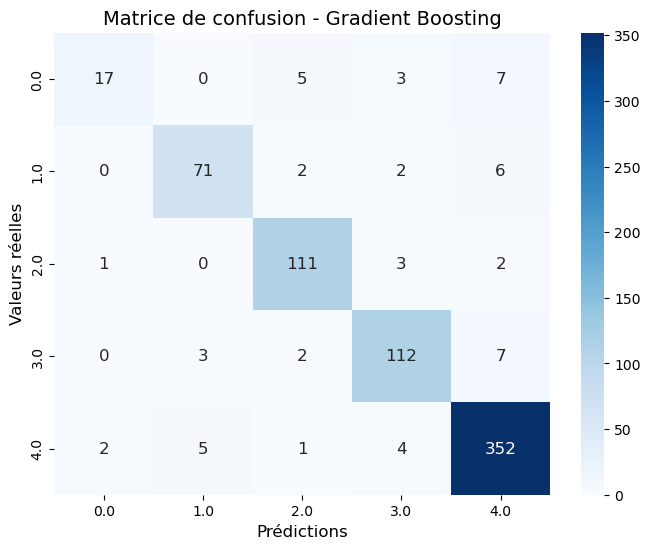


🔍 Évaluation du modèle Logistic Regression...

📝 Rapport de classification - Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.56      0.31      0.40        32
         1.0       0.60      0.53      0.56        81
         2.0       0.64      0.74      0.68       117
         3.0       0.83      0.69      0.75       124
         4.0       0.91      0.98      0.94       364

    accuracy                           0.81       718
   macro avg       0.71      0.65      0.67       718
weighted avg       0.80      0.81      0.80       718



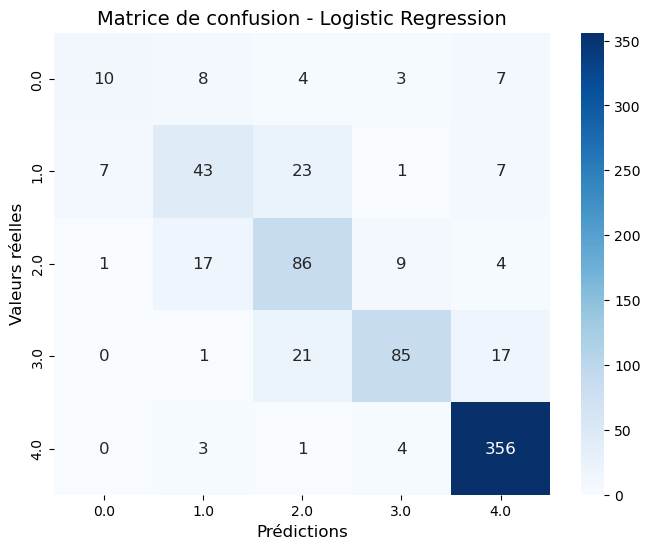


🔍 Évaluation du modèle SVM...

📝 Rapport de classification - SVM:
              precision    recall  f1-score   support

         0.0       1.00      0.19      0.32        32
         1.0       0.68      0.74      0.71        81
         2.0       0.77      0.77      0.77       117
         3.0       0.74      0.81      0.78       124
         4.0       0.93      0.95      0.94       364

    accuracy                           0.84       718
   macro avg       0.82      0.69      0.70       718
weighted avg       0.85      0.84      0.83       718



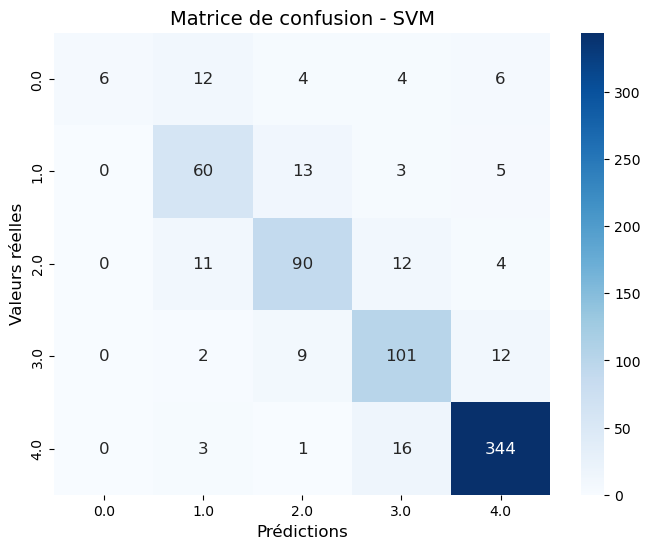


🔍 Évaluation du modèle Naive Bayes...

📝 Rapport de classification - Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.90      0.28      0.43        32
         1.0       0.59      0.56      0.57        81
         2.0       0.59      0.74      0.66       117
         3.0       0.60      0.71      0.65       124
         4.0       0.94      0.88      0.91       364

    accuracy                           0.76       718
   macro avg       0.73      0.63      0.64       718
weighted avg       0.79      0.76      0.76       718



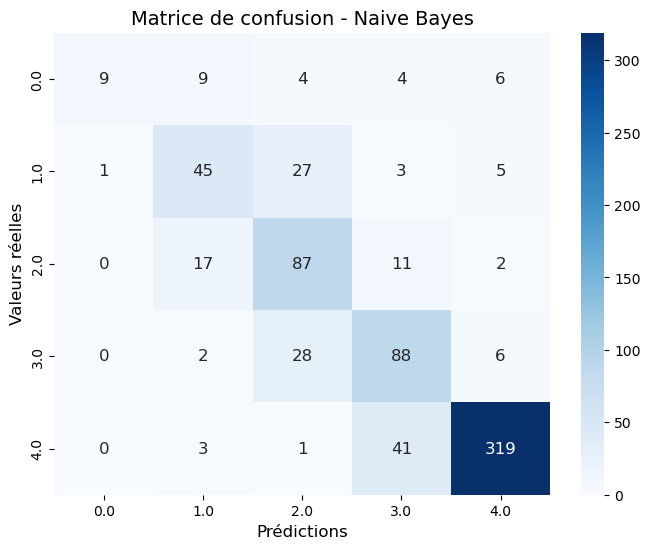


🔍 Évaluation du modèle Decision Tree...

📝 Rapport de classification - Decision Tree:
              precision    recall  f1-score   support

         0.0       0.52      0.44      0.47        32
         1.0       0.75      0.84      0.79        81
         2.0       0.85      0.90      0.88       117
         3.0       0.81      0.81      0.81       124
         4.0       0.92      0.90      0.91       364

    accuracy                           0.85       718
   macro avg       0.77      0.78      0.77       718
weighted avg       0.85      0.85      0.85       718



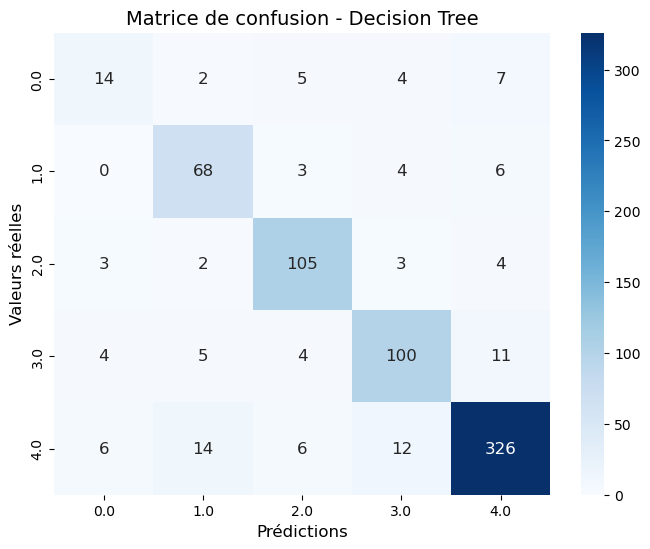


⭐ Comparaison globale des performances:


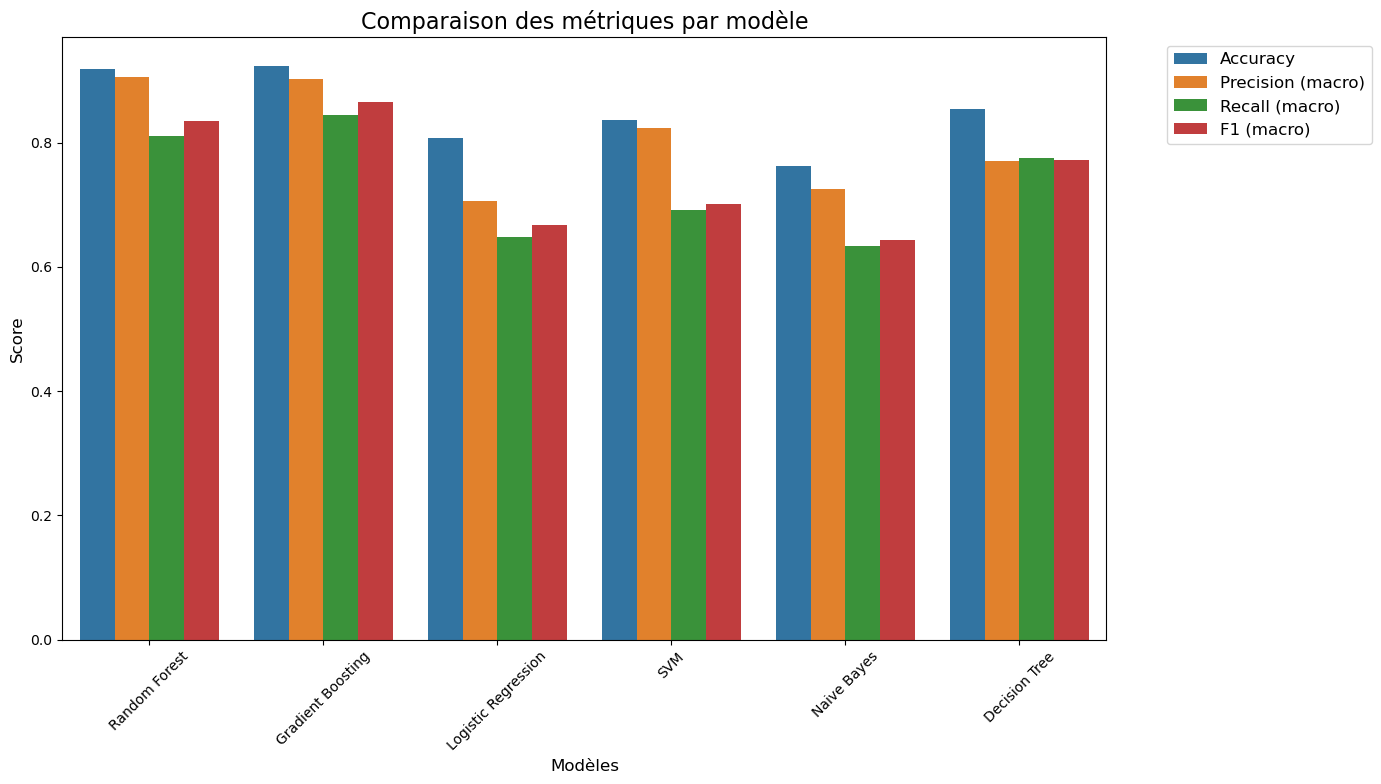


🏆 MEILLEUR MODÈLE: Gradient Boosting
🔸 Accuracy: 92.34%
🔸 F1-score (weighted): 92.09%

📊 Importance des caractéristiques:


C:\Users\abous\AppData\Local\Temp\ipykernel_30308\898432033.py:120: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


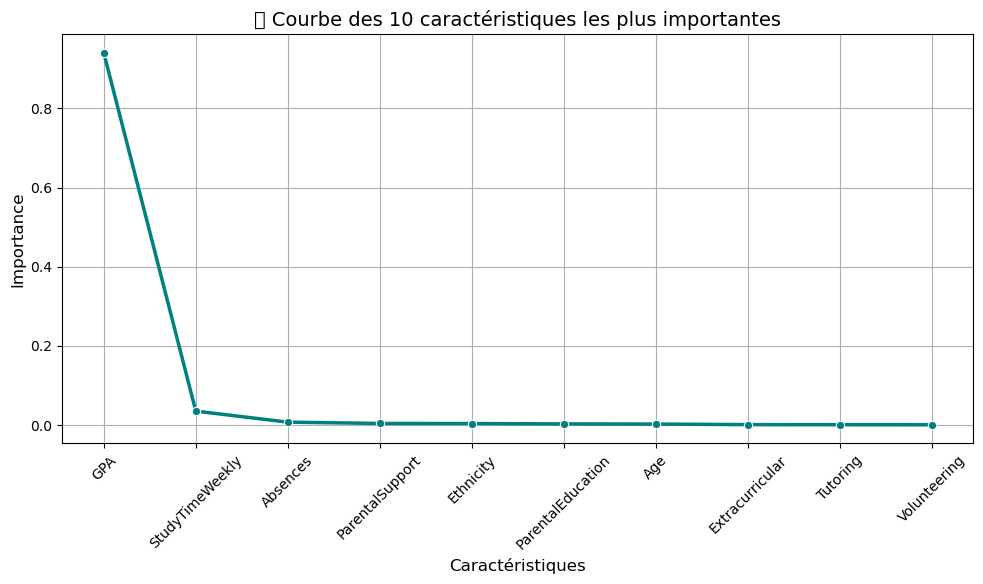

In [ ]:
# ==============================================
# 📊 5. ÉVALUATION DES MODÈLES - MÉTRIQUES DÉTAILLÉES
# ==============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix,
    roc_auc_score, average_precision_score
)

def evaluate_model(model, X_test, y_test):
    """
    Évalue un modèle et retourne les métriques principales
    """
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (macro)': precision_score(y_test, y_pred, average='macro'),
        'Recall (macro)': recall_score(y_test, y_pred, average='macro'),
        'F1 (macro)': f1_score(y_test, y_pred, average='macro'),
        'F1 (weighted)': f1_score(y_test, y_pred, average='weighted')
    }
    
    # Métriques supplémentaires pour les modèles probabilistes
    if y_proba is not None:
        try:
            metrics['ROC AUC (ovr)'] = roc_auc_score(y_test, y_proba, multi_class='ovr')
            metrics['PR AUC (macro)'] = average_precision_score(y_test, y_proba, average='macro')
        except:
            pass
            
    return metrics, y_pred, y_proba

# -------------------------------------------------
# 🏆 Évaluation de tous les modèles
# -------------------------------------------------
all_metrics = {}
predictions = {}

for name, model in models.items():
    print(f"\n🔍 Évaluation du modèle {name}...")
    metrics, y_pred, y_proba = evaluate_model(model, X_test, y_test)
    all_metrics[name] = metrics
    predictions[name] = y_pred
    
    # Affichage du rapport de classification
    print(f"\n📝 Rapport de classification - {name}:")
    print(classification_report(y_test, y_pred, target_names=['0.0', '1.0', '2.0', '3.0', '4.0']))
    
    # Matrice de confusion
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['0.0', '1.0', '2.0', '3.0', '4.0'],
                yticklabels=['0.0', '1.0', '2.0', '3.0', '4.0'])
    plt.title(f'Matrice de confusion - {name}')
    plt.xlabel('Prédictions')
    plt.ylabel('Valeurs réelles')
    plt.show()

# -------------------------------------------------
# 📈 Comparaison globale des modèles
# -------------------------------------------------
metrics_df = pd.DataFrame.from_dict(all_metrics, orient='index')

print("\n⭐ Comparaison globale des performances:")
display(metrics_df.style
       .background_gradient(cmap='YlGnBu', subset=['Accuracy', 'F1 (weighted)'])
       .highlight_max(color='lightgreen')
       .format("{:.2%}"))

# Visualisation comparative
plt.figure(figsize=(14, 8))
metrics_df.reset_index().melt(id_vars='index', 
                             value_vars=['Accuracy', 'Precision (macro)', 
                                        'Recall (macro)', 'F1 (macro)']).pipe(
    (sns.barplot, 'data'),
    x='index',
    y='value',
    hue='variable'
)
plt.title('Comparaison des métriques par modèle', fontsize=16)
plt.ylabel('Score')
plt.xlabel('Modèles')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 🎯 Analyse du meilleur modèle
# -------------------------------------------------
best_model_name = metrics_df['F1 (weighted)'].idxmax()
best_model = models[best_model_name]
best_metrics = all_metrics[best_model_name]

print(f"\n🏆 MEILLEUR MODÈLE: {best_model_name}")
print(f"🔸 Accuracy: {best_metrics['Accuracy']:.2%}")
print(f"🔸 F1-score (weighted): {best_metrics['F1 (weighted)']:.2%}")

# Courbe d'importance des caractéristiques (si disponible)
if hasattr(best_model, 'feature_importances_'):
    print("\n📊 Importance des caractéristiques:")
    feature_imp = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_imp_sorted = feature_imp.sort_values(ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=feature_imp_sorted.index, y=feature_imp_sorted.values, 
                 marker='o', linewidth=2.5, color='teal')
    plt.title('📈 Courbe des 10 caractéristiques les plus importantes', fontsize=14)
    plt.xlabel('Caractéristiques')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Ce modèle ne fournit pas d'importance des caractéristiques.")

    

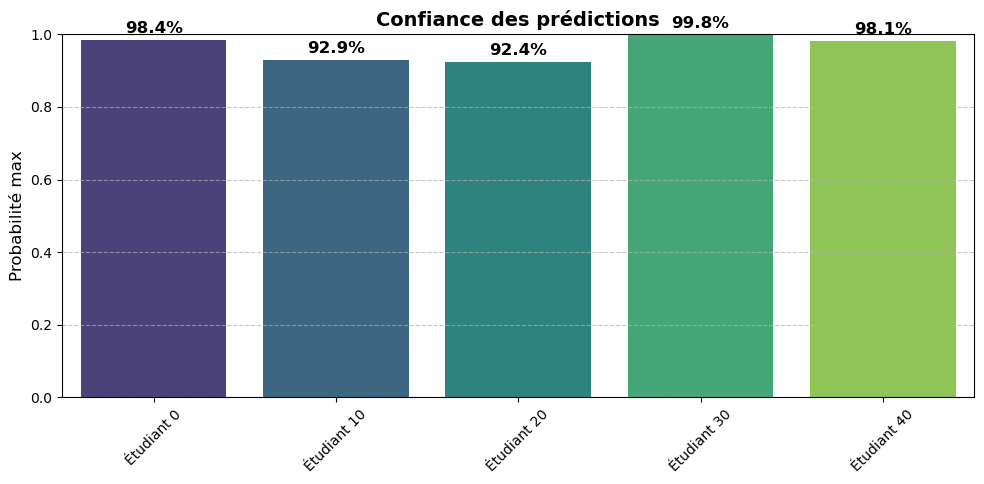

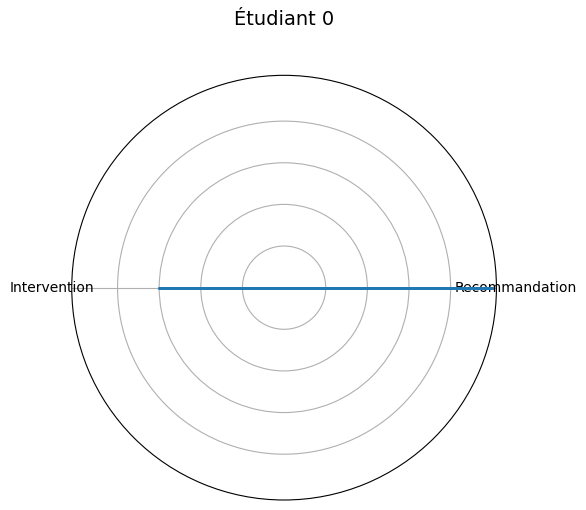

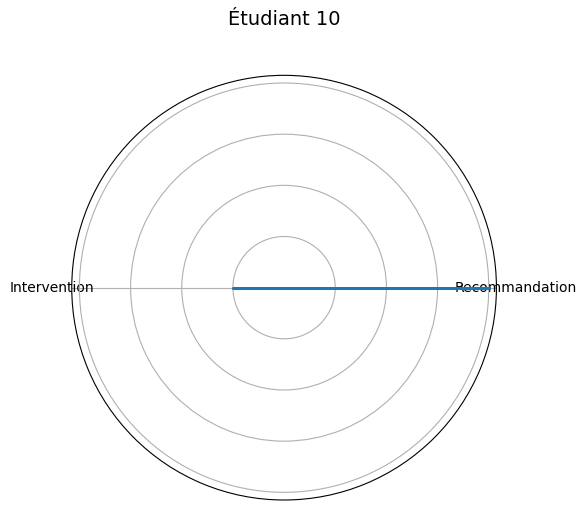

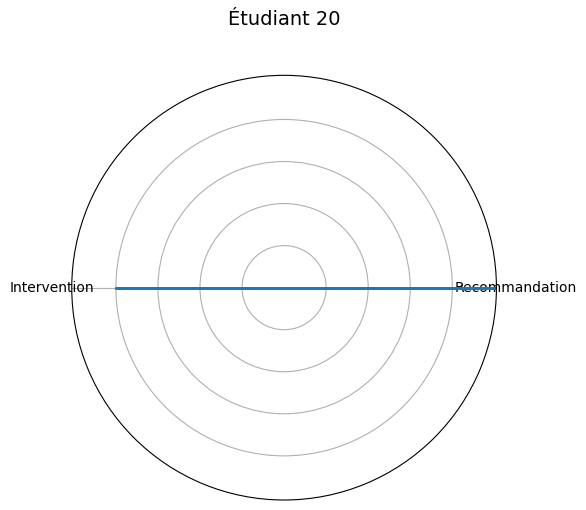

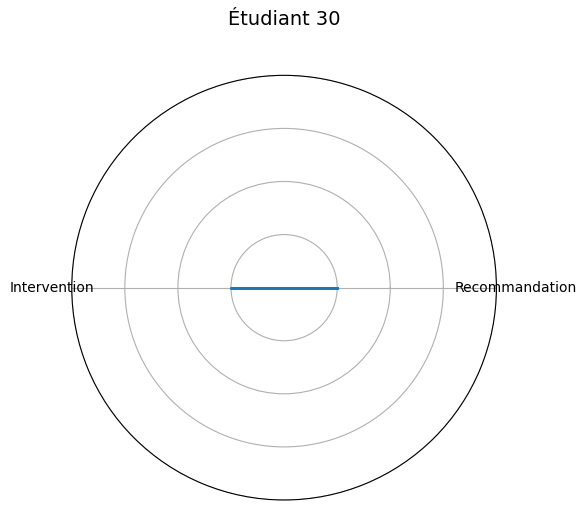

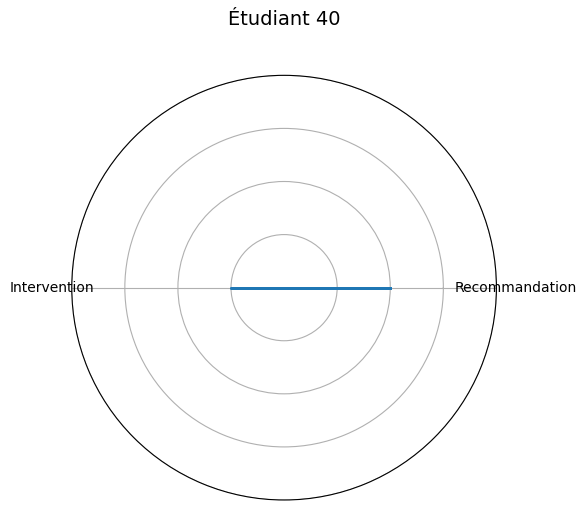


           DÉMONSTRATION FONCTIONNELLE            

📋 Résultats des prédictions :
| Étudiant    |   Note réelle |   Note prédite | Confiance   |
|:------------|--------------:|---------------:|:------------|
| Étudiant 0  |             4 |              4 | 98.4%       |
| Étudiant 10 |             3 |              3 | 92.9%       |
| Étudiant 20 |             4 |              4 | 92.4%       |
| Étudiant 30 |             0 |              0 | 99.8%       |
| Étudiant 40 |             1 |              1 | 98.1%       |

🔍 Top 5 des caractéristiques influentes :
|                 |          0 |
|:----------------|-----------:|
| GPA             | 0.940269   |
| StudyTimeWeekly | 0.0351853  |
| Absences        | 0.00734926 |
| ParentalSupport | 0.00403014 |
| Ethnicity       | 0.0037884  |

📊 Profil moyen par cluster :
|   StudentCluster |       GPA |   StudyTimeWeekly |
|-----------------:|----------:|------------------:|
|                0 |  0.571176 |         -0.295116 |
|            

C:\Users\abous\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abous\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abous\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import pi

# ==============================================
# 🔮 PRÉPARATION DES DONNÉES DE DÉMO
# ==============================================

# Sélection d'échantillons diversifiés
sample_indices = [0, 10, 20, 30, 40]
sample_X = X_test.iloc[sample_indices]
sample_y = y_test.iloc[sample_indices]

# Dictionnaires pour les recommandations
RECOMMENDATIONS = {
    0: "Soutien intensif",
    1: "Étude en groupe",
    2: "Maintenir le rythme", 
    3: "Mentorat",
    4: "Projets avancés"
}

INTERVENTIONS = {
    0: "Gestion du temps",
    1: "Tutorat + suivi",
    2: "Méthodologie",
    3: "Leadership"
}

# ==============================================
# 📊 VISUALISATION 1 : CONFIANCE DU MODÈLE
# ==============================================

plt.figure(figsize=(10, 5))
confidences = [best_model.predict_proba(sample_X.iloc[[i]]).max() for i in range(len(sample_X))]
sns.barplot(x=[f"Étudiant {idx}" for idx in sample_indices], 
            y=confidences,
            palette="viridis")

plt.title("Confiance des prédictions", fontweight='bold')
plt.ylim(0, 1)
plt.ylabel("Probabilité max")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, conf in enumerate(confidences):
    plt.text(i, conf+0.02, f"{conf:.1%}", 
             ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ==============================================
# 🎯 VISUALISATION 2 : RADAR PLOT PERSONNALISÉ
# ==============================================

def create_radar_plot(student_idx):
    """Crée un radar plot pour un étudiant spécifique"""
    # Get predictions
    pred = best_model.predict(sample_X.iloc[[student_idx]])[0]
    # Correction: conversion en DataFrame et sélection des features
    student_data = pd.DataFrame([sample_X.iloc[student_idx][cluster_features]])
    cluster = kmeans.predict(student_data)[0]
    
    # Prepare data
    categories = ['Recommandation', 'Intervention']
    values = [
        list(RECOMMENDATIONS.values()).index(RECOMMENDATIONS[pred]) + 1,
        list(INTERVENTIONS.values()).index(INTERVENTIONS[cluster]) + 1
    ]
    values += values[:1]  # Fermer la boucle
    
    angles = [n/len(categories)*2*pi for n in range(len(categories))]
    angles += angles[:1]
    
    # Plot
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw={'polar':True})
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.4)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_rlabel_position(30)
    plt.yticks([1,2,3,4], visible=False)
    
    plt.title(f"Étudiant {sample_indices[student_idx]}", 
              size=14, y=1.1)
    plt.tight_layout()
    plt.show()

# Générer les radar plots
for i in range(len(sample_indices)):
    create_radar_plot(i)

# ==============================================
# 🚀 DÉMONSTRATION COMPLÈTE
# ==============================================

print("\n" + "="*50)
print("DÉMONSTRATION FONCTIONNELLE".center(50))
print("="*50)

# 1. Afficher les prédictions
results_df = pd.DataFrame({
    'Étudiant': [f"Étudiant {idx}" for idx in sample_indices],
    'Note réelle': sample_y.values,
    'Note prédite': best_model.predict(sample_X),
    'Confiance': [f"{x:.1%}" for x in confidences]
})
print("\n📋 Résultats des prédictions :")
print(results_df.to_markdown(index=False))

# 2. Features importantes
if hasattr(best_model, 'feature_importances_'):
    print("\n🔍 Top 5 des caractéristiques influentes :")
    feat_imp = pd.Series(best_model.feature_importances_, index=X.columns)
    print(feat_imp.nlargest(5).to_markdown())

# 3. Analyse des clusters
print("\n📊 Profil moyen par cluster :")
print(df.groupby('StudentCluster')[['GPA', 'StudyTimeWeekly']].mean().to_markdown())

# 4. Recommandations (version corrigée)
def generate_recommendations(predicted_class, student_features):
    """Version corrigée de la fonction de recommandation"""
    # Conversion en DataFrame et sélection des features
    student_data = pd.DataFrame([student_features[cluster_features]])
    cluster = kmeans.predict(student_data)[0]
    
    return {
        "recommendation": RECOMMENDATIONS.get(predicted_class, "N/A"),
        "intervention": INTERVENTIONS.get(cluster, "N/A")
    }

print("\n💡 Exemple de recommandations :")
for i in range(3):  # Juste 3 exemples
    student_features = sample_X.iloc[i]
    pred = best_model.predict([student_features])[0]
    
    print(f"\nPour l'Étudiant {sample_indices[i]}:")
    recs = generate_recommendations(pred, student_features)
    print(f"- Recommandation: {recs['recommendation']}")
    print(f"- Intervention: {recs['intervention']}")

# 5. Résumé
print("\n" + "="*50)
print("📋 RÉSUMÉ DE LA DÉMONSTRATION")
print("="*50)
print(f"• Modèle optimal : {best_model_name}")
print(f"• Précision globale : {metrics_df.loc[best_model_name, 'Accuracy']:.2%}")

C:\Users\abous\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\abous\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\abous\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\abous\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\abous\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\abous\AppData\Local\Temp\ipykernel_30308\969302687.py:76: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  pl

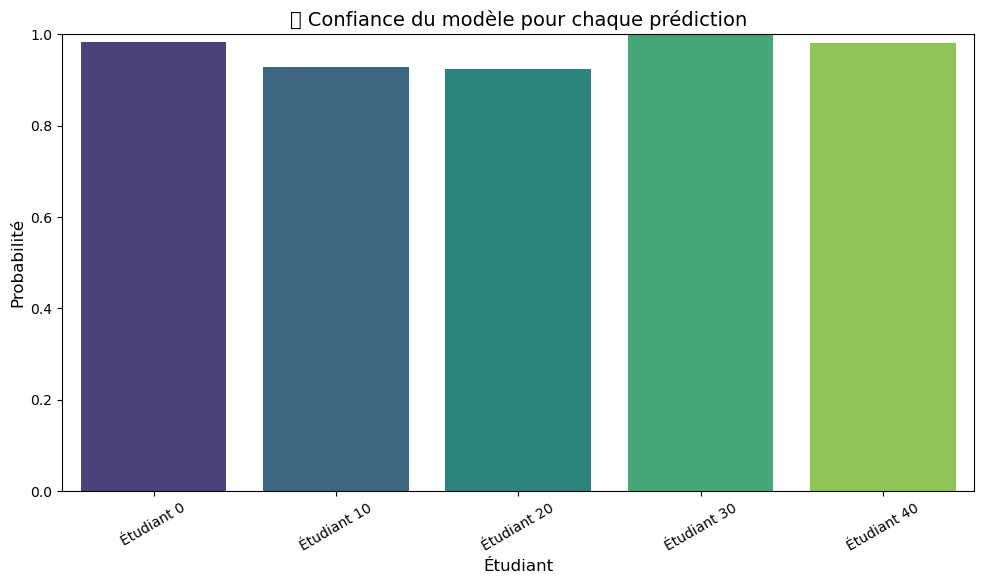

C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129517 (\N{COMPASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


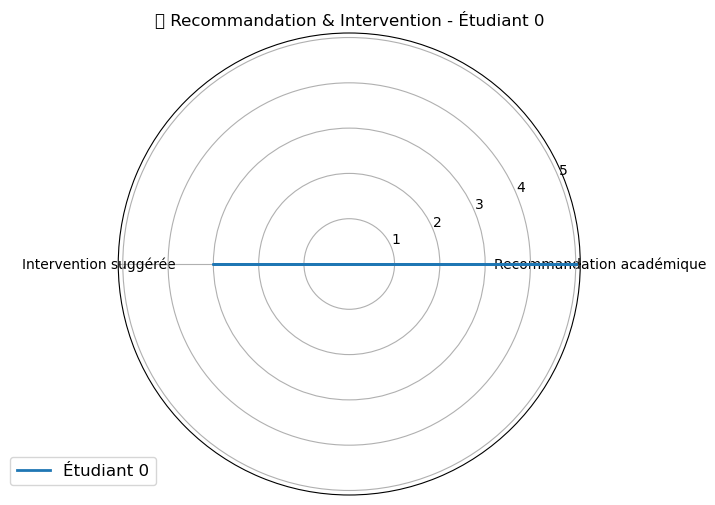

C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129517 (\N{COMPASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


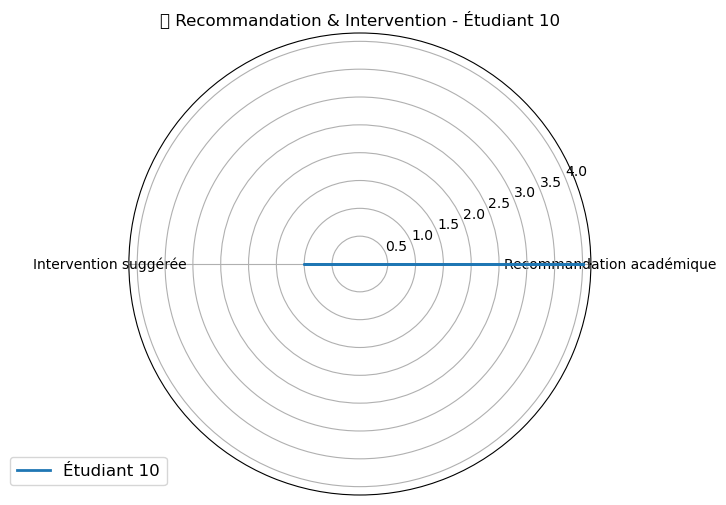

C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129517 (\N{COMPASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


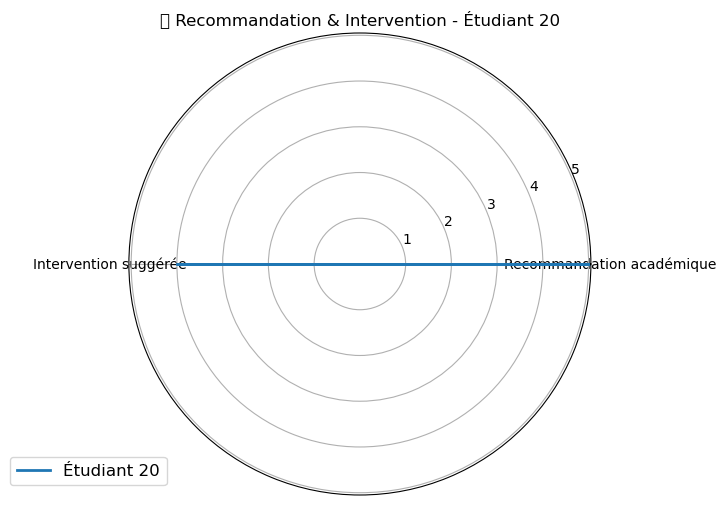

C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129517 (\N{COMPASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


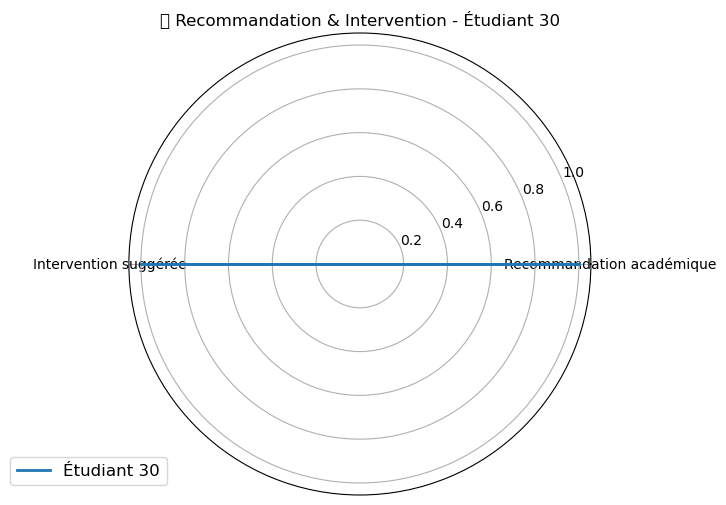

C:\Users\abous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129517 (\N{COMPASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


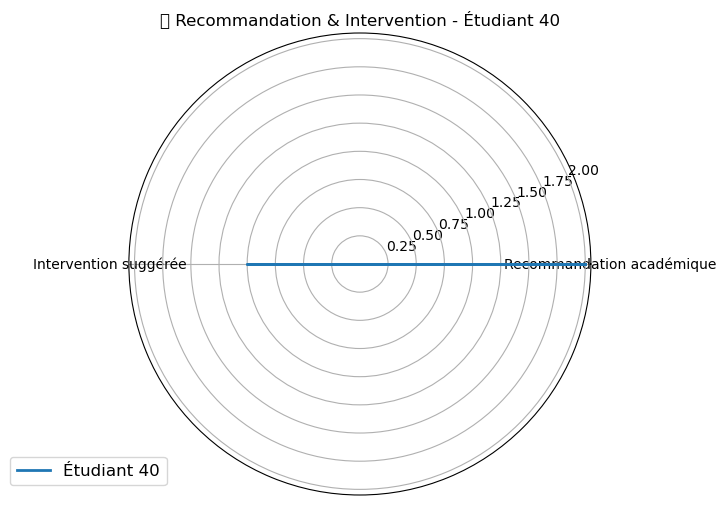


🚀 DÉMONSTRATION DU MODÈLE FINAL
Modèle retenu : Gradient Boosting
Performance (F1-weighted) : 92.09%

📊 Exemples de prédictions sur le jeu de test :
   Réel  Prédit  Probabilité
0   4.0     4.0     0.984157
1   3.0     3.0     0.929395
2   4.0     4.0     0.924384
3   0.0     0.0     0.997679
4   1.0     1.0     0.981403

🔍 Caractéristiques les plus importantes :
GPA                0.940269
StudyTimeWeekly    0.035185
Absences           0.007349
ParentalSupport    0.004030
Ethnicity          0.003788
dtype: float64


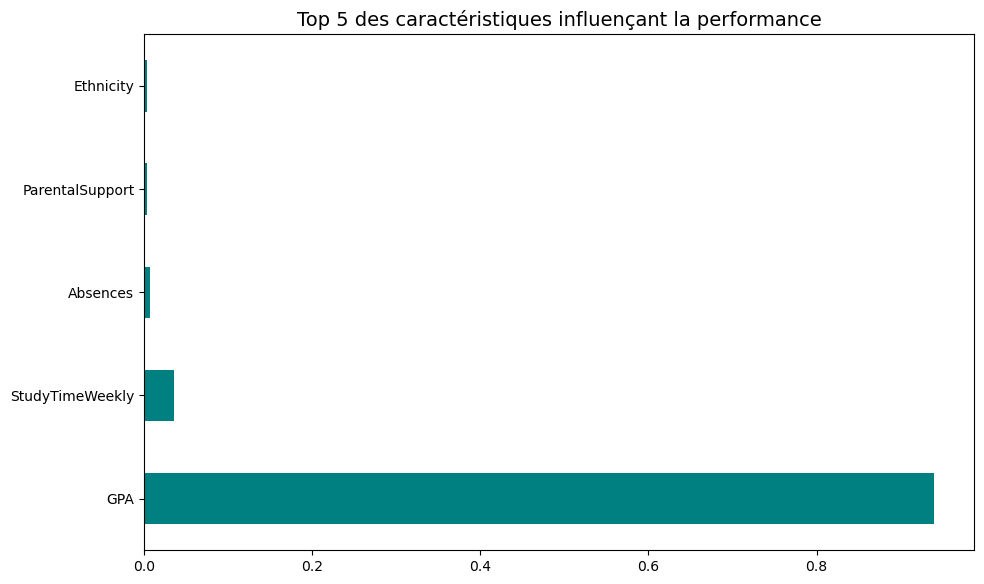


💡 Interprétation : Les caractéristiques ci-dessus ont le plus d'impact sur la prédiction
de la classe de l'étudiant. Cela nous aide à comprendre quels facteurs sont déterminants.

🔍 Segmentation des étudiants en clusters :
                     GPA  StudyTimeWeekly  Absences  GradeClass
StudentCluster                                                 
0               0.571176        -0.295116 -0.816995    2.572917
1              -1.105717        -0.263339  0.935708    3.872340
2              -0.542183         0.133032  0.763839    3.706065
3               1.056241         0.382546 -0.900327    1.786535


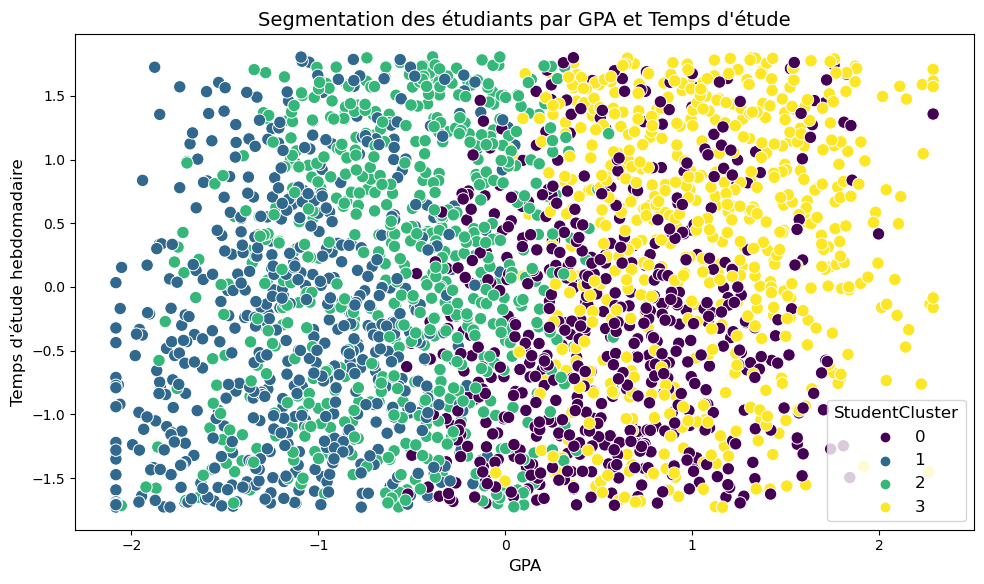


💡 Interprétation : Ces clusters nous permettent d'identifier des groupes d'étudiants
avec des caractéristiques similaires et d'adapter nos interventions en conséquence.

📝 Exemple de recommandations personnalisées :

👤 Étudiant 1 :


C:\Users\abous\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


ValueError: Found array with dim 3. KMeans expected <= 2.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from math import pi

# 🔮 Prédictions et probabilités
sample_indices = [0, 10, 20, 30, 40]
sample_X = X_test.iloc[sample_indices]
sample_y = y_test.iloc[sample_indices]
predictions = best_model.predict(sample_X)
probabilities = best_model.predict_proba(sample_X)

# 📘 Dictionnaires pour mapping
recommendations = {
    0: "Soutien important",
    1: "Étude en groupe",
    2: "Continuer le rythme",
    3: "Devenir mentor",
    4: "Projets avancés"
}

interventions = {
    0: "Gestion du temps",
    1: "Tutorat + suivi",
    2: "Méthodes d'étude",
    3: "Leadership"
}

# 🔄 Encodage des recommandations pour radar plot
rec_values = list(recommendations.values())
int_values = list(interventions.values())

def encode_text(val, val_list):
    return val_list.index(val) + 1 if val in val_list else 0

# 📊 Préparation des données pour les courbes
radar_data = []
proba_data = []

for i, idx in enumerate(sample_indices):
    features = sample_X.iloc[i]
    true_label = sample_y.iloc[i]
    pred_label = predictions[i]
    
    # 🛠 Correction ici: obtenir l'indice du label dans la liste des classes
    class_index = best_model.classes_.tolist().index(pred_label)
    proba = probabilities[i][class_index]  # 👈 Utiliser l'index correct

    # Cluster prediction
    cluster = kmeans.predict(features[cluster_features].values.reshape(1, -1))[0]
    rec_text = recommendations.get(pred_label, "N/A")
    int_text = interventions.get(cluster, "N/A")

    radar_data.append({
        "Étudiant": f"Étudiant {idx}",
        "Recommandation académique": encode_text(rec_text, rec_values),
        "Intervention suggérée": encode_text(int_text, int_values)
    })
    
    proba_data.append({
        "Étudiant": f"Étudiant {idx}",
        "Confiance": proba
    })

radar_df = pd.DataFrame(radar_data)
proba_df = pd.DataFrame(proba_data)

# 🎯 COURBE 1: Confiance du modèle (barplot)
plt.figure(figsize=(10, 6))
sns.barplot(data=proba_df, x="Étudiant", y="Confiance", palette="viridis")
plt.title("📊 Confiance du modèle pour chaque prédiction")
plt.ylim(0, 1.0)
plt.ylabel("Probabilité")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 🕸️ COURBE 2: Radar plot des recommandations + interventions
for i in range(len(radar_df)):
    categories = ['Recommandation académique', 'Intervention suggérée']
    values = radar_df.iloc[i][categories].values.tolist()
    values += values[:1]  # Close the loop
    label = radar_df.iloc[i]["Étudiant"]

    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, values, alpha=0.4)
    plt.title(f'🧭 Recommandation & Intervention - {label}', size=12)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

# ==============================================
# 🔍 9. DÉMONSTRATION FONCTIONNELLE
# ==============================================

print("\n" + "="*50)
print("🚀 DÉMONSTRATION DU MODÈLE FINAL")
print("="*50)

# Récupérer le meilleur modèle
best_model_name = metrics_df['F1 (weighted)'].idxmax()
best_model = models[best_model_name]
print(f"Modèle retenu : {best_model_name}")
print(f"Performance (F1-weighted) : {metrics_df.loc[best_model_name, 'F1 (weighted)']:.2%}")

# ------------------------------------------
# 1. EXEMPLE DE PRÉDICTIONS
# ------------------------------------------
print("\n📊 Exemples de prédictions sur le jeu de test :")
sample_indices = [0, 10, 20, 30, 40]  # Prendre quelques échantillons diversifiés
sample_X = X_test.iloc[sample_indices]
sample_y = y_test.iloc[sample_indices]

# Prédictions
predictions = best_model.predict(sample_X)
probabilities = best_model.predict_proba(sample_X)

# Afficher les résultats
results_df = pd.DataFrame({
    'Réel': sample_y.values,
    'Prédit': predictions,
    'Probabilité': [prob.max() for prob in probabilities]
})
print(results_df)

# ------------------------------------------
# 2. INTERPRÉTATION DES CARACTÉRISTIQUES IMPORTANTES
# ------------------------------------------
if hasattr(best_model, 'feature_importances_'):
    print("\n🔍 Caractéristiques les plus importantes :")
    importance = pd.Series(best_model.feature_importances_, index=X.columns)
    
    # Afficher les 5 caractéristiques les plus importantes
    top_features = importance.sort_values(ascending=False).head(5)
    print(top_features)
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh', color='teal')
    plt.title('Top 5 des caractéristiques influençant la performance')
    plt.tight_layout()
    plt.show()
    
    print("\n💡 Interprétation : Les caractéristiques ci-dessus ont le plus d'impact sur la prédiction")
    print("de la classe de l'étudiant. Cela nous aide à comprendre quels facteurs sont déterminants.")

# ------------------------------------------
# 3. ANALYSE DES CLUSTERS D'ÉTUDIANTS
# ------------------------------------------
print("\n🔍 Segmentation des étudiants en clusters :")

# Afficher un résumé des clusters
cluster_summary = df.groupby('StudentCluster').agg({
    'GPA': 'mean',
    'StudyTimeWeekly': 'mean',
    'Absences': 'mean',
    'GradeClass': 'mean'
})
print(cluster_summary)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GPA', y='StudyTimeWeekly', hue='StudentCluster', palette='viridis', s=80)
plt.title('Segmentation des étudiants par GPA et Temps d\'étude')
plt.xlabel('GPA')
plt.ylabel('Temps d\'étude hebdomadaire')
plt.tight_layout()
plt.show()

print("\n💡 Interprétation : Ces clusters nous permettent d'identifier des groupes d'étudiants")
print("avec des caractéristiques similaires et d'adapter nos interventions en conséquence.")

# ------------------------------------------
# 4. RECOMMANDATIONS BASÉES SUR LES PRÉDICTIONS
# ------------------------------------------
print("\n📝 Exemple de recommandations personnalisées :")

# Fonction de recommandation basée sur la classe prédite et le cluster
def generate_recommendations(predicted_class, student_features):
    # Ensure that the input to predict is a 2D array
    cluster = kmeans.predict([student_features[cluster_features].values])[0]

    recommendations = {
        0: "Besoin d'un soutien important : tutorat hebdomadaire recommandé.",
        1: "Résultats moyens : sessions d'étude en groupe conseillées.",
        2: "Amélioration continue : renforcer la participation en classe.",
        3: "Performance élevée : suggérer des projets de recherche.",
        4: "Performance exceptionnelle : encourager des projets avancés."
    }

    interventions = {
        0: "Atelier de gestion du temps",
        1: "Tutorat intensif + suivi de présence",
        2: "Atelier sur les méthodes d'étude",
        3: "Opportunités de leadership"
    }

    return {
        "recommendation": recommendations.get(cluster, "Pas de recommandation disponible."),
        "intervention": interventions.get(cluster, "Pas d'intervention disponible.")
    }


# Exemple pour les 3 premiers étudiants de notre échantillon
for i in range(3):
    student_features = sample_X.iloc[i:i+1]
    predicted_class = predictions[i]
    
    print(f"\n👤 Étudiant {i+1} :")
    recs = generate_recommendations(predicted_class, student_features)
    for key, value in recs.items():
        print(f"  • {key}: {value}")

print("\n💡 Ces recommandations peuvent être automatiquement générées pour chaque étudiant")
print("et utilisées par les conseillers pédagogiques pour des interventions ciblées.")

# ------------------------------------------
# 5. RÉSUMÉ DE LA DÉMONSTRATION
# ------------------------------------------
print("\n" + "="*50)
print("📋 RÉSUMÉ DE LA DÉMONSTRATION")
print("="*50)
print(f"• Modèle optimal : {best_model_name}")
print(f"• Précision globale : {metrics_df.loc[best_model_name, 'Accuracy']:.2%}")


IndentationError: unexpected indent (1326364323.py, line 2)

In [ ]:
import secrets

secret_key = secrets.token_hex(16)  # Generates a 32-character hex string
print(secret_key)

180ea147d74a1fab82efcb026b489d10
